## **ASSIGNMENT 4**
# Instructor: Gianfranco Doretto
# Due: November 27, 2022 by the end of the day
# Student Name: Ali Zafari

The assignment is composed of Three sections. The first touches the idea of computation graphs and backpropogation. The second section scrates the surface of Neural Networks. The third section takes a glance on sementic segmentation on images.

**Submission Instructions**

You will need to prepare a folder called

```hw4_YOUR-LAST-NAME_YOUR-FIRST-NAME```

In that folder you want to put
- Your Colab notebook (fill out the Student Name above)
- For every question that requires submitting data you create a subfolder called ```task_NUMBER``` and you put there the files with adequate naming. If we do not understand that something is there you will not get credit!
- For question which requires writing must be done in preassigned places instructed in *italics*. For math, use the latex notation as colab supports latex. For more info on latex use [this](https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/master/lessons/00/intro_to_latex.ipynb).

If we do not understand that something is there you will not get credit!

You will need to zip the folder and you will need to submit the zip file ```hw4_YOUR-LAST-NAME_YOUR-FIRST-NAME.zip``` to the instructor by sharing the file via Google Drive.

In order to [share a file](https://support.google.com/drive/answer/2494822?hl=en&co=GENIE.Platform%3DDesktop) with the instructor please use this email gidoretto@mix.wvu.edu

During the evaluation we are going to test your Python notebook with Google Colab. So, the assumption is that you are going to do all the development with Colab. We will run your notebook by running the cells sequentially. They will have to produce the expected result in order for you to get credit.

**Submission Helper**

We have put color coded text to make it easier for you to distinguish between types of submission.

<font color='red'>[CODE]</font> tag for a submission requires you to code.

<font color='blue'>[ANSWER]</font> tag for a submission requires you to write something (including math where needed).

<font color='green'>[DATA]</font> tag for a submission requires you to submit corresponding file. This will mostly include image files or graph plot files.

In [1]:
import argparse
import os
import pickle
import random
import numpy as np
from inspect import signature

### Please change the `dir_path` in the block below accordingly. This will be used to save files and binary data later in this assignement.

In [2]:
# Mount your MIX Google Drive
from google.colab import drive
drive_mount = "/content/drive"
drive.mount(drive_mount)

# TODO: Set your path to the assignment's image folder
dir_path = "/MyDrive/myCV/Assignment4/"
global source
source = drive_mount+dir_path
print(os.listdir(source))

Mounted at /content/drive
['backprop', '.png', 'checkpoint.pkl', 'output_test', 'models', 'task_6_b', 'task_6_d', '.ipynb_checkpoints', 'task_5_b', 'task_5_c', 'task_2_a', 'hw4_Zafari_Ali', 'CS678_Assignment_4.ipynb']


# Exercise 1: *Computational Graphs and Backprop* [25 points]


We have seen that representing mathematical expressions as computational graphs allows us to easily compute gradients using backpropagation. After writing a mathematical expression as a computational graph, we can easily translate it into code. In this problem you’ll gain some experience with backpropagation in a simplified setting where all of the inputs, outputs, and intermediate values are all scalar values instead vectors, matrices, or tensors.


In the forward pass we receive the inputs (leaf nodes) of the graph and compute the output. The output is
typically a scalar value representing the loss L on a minibatch of training data.


In the backward pass we compute the derivative of the graph’s output L with respect to each input of the graph. There is no need to reason globally about the derivative of the expression represented by the graph; in-
stead when using backpropagation we need only think locally about how derivatives flow backward through each node of the graph. Specifically, during backpropagation a node that computes $y = f(x_1, . . . , x_N )$
receive an upstream gradient $\frac{∂L}{∂y}$ giving the derivative of the loss with respect the the node output and computes downstream gradients $\frac{∂L}{∂x_1}$, . . . , $\frac{∂L}{∂x_N}$ giving the derivative of the loss with respect to the node inputs. Here’s an example of a simple computational graph and the corresponding code for the forward and backward passes. Notice how each $\color{lightblue}{\text{outgoing edge}}$ from an operator gives rise to one line of code in the forwardpass, and each $\color{orange}{\text{ingoing edge}}$ to an operator gives rise to one line of code in the backward pass.

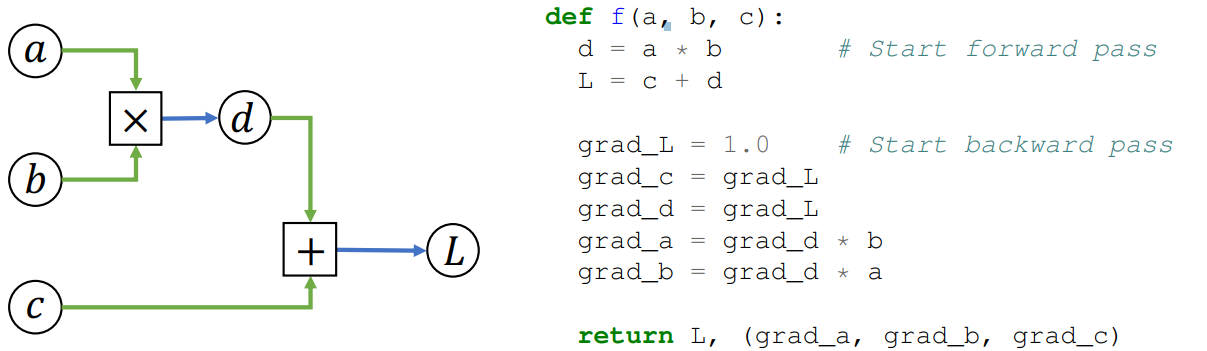

Sometimes you’ll see computational graphs where one piece of data is used as input to multiple operations.
In such cases you can make the logic in the backward pass cleaner by rewriting the graph to include an
explicit $\textbf{copy}$ operator that returns multiple copies of its input. In the backward pass you can then compute
separate gradients for the two copies, which will sum when backpropagating through the copy operator:

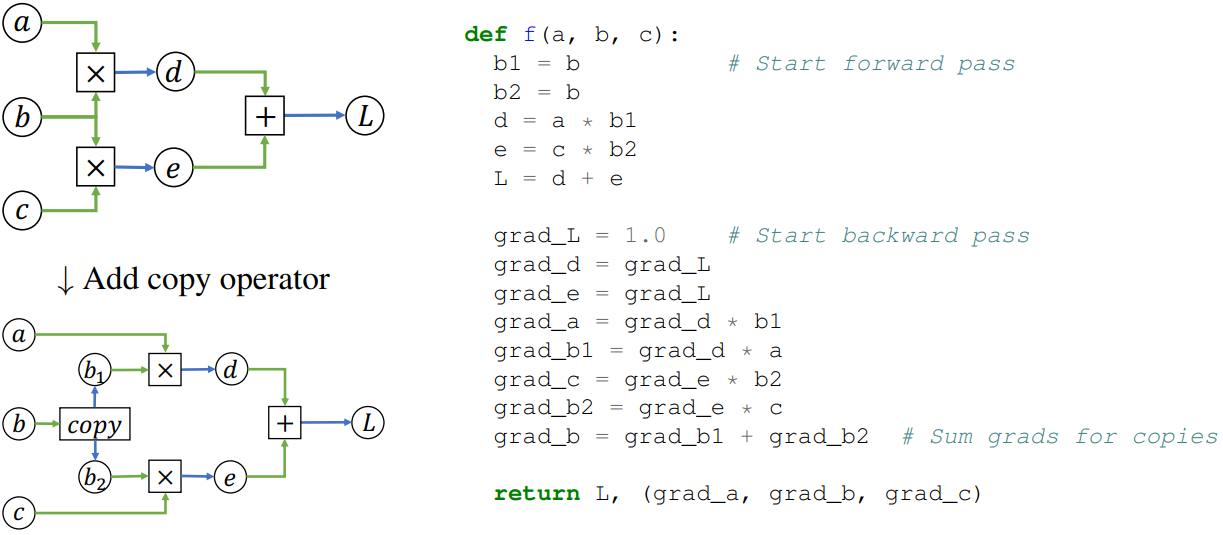

## Task 1: Implementing Computational Graphs [15 points]


Below we’ve drawn three computational graphs for you to practice implementing forward and backward passes. The code block below contains stubs for each of these computational graphs. You can use the driver functions below the computation code block to check your implementation.

The file **backprop/backprop-data.pkl** contains sample inputs and outputs for the three computational graphs; the driver function block (provided below the code block) loads inputs from this file for you when checking your forward passes. *In order to make it work properly, make sure you have initialized the `source` variable correctly at the begining of this notebook.*

To check the backward passes, we have provided the driver function `numeric_gradient`. Given a function $f : \Re → \Re$, we can approximate the gradient of $f$ at a point $x_0 ∈ \Re$ as:

\begin{align}
\frac{∂f}{∂x}(x_0)≈\frac{f(x_0 + h) − f(x_0 − h)}{2h}
\end{align}

Each of these computational graphs implements a function or operation commonly used in machine learning. Can you guess what they are? (This is just for fun, not required).

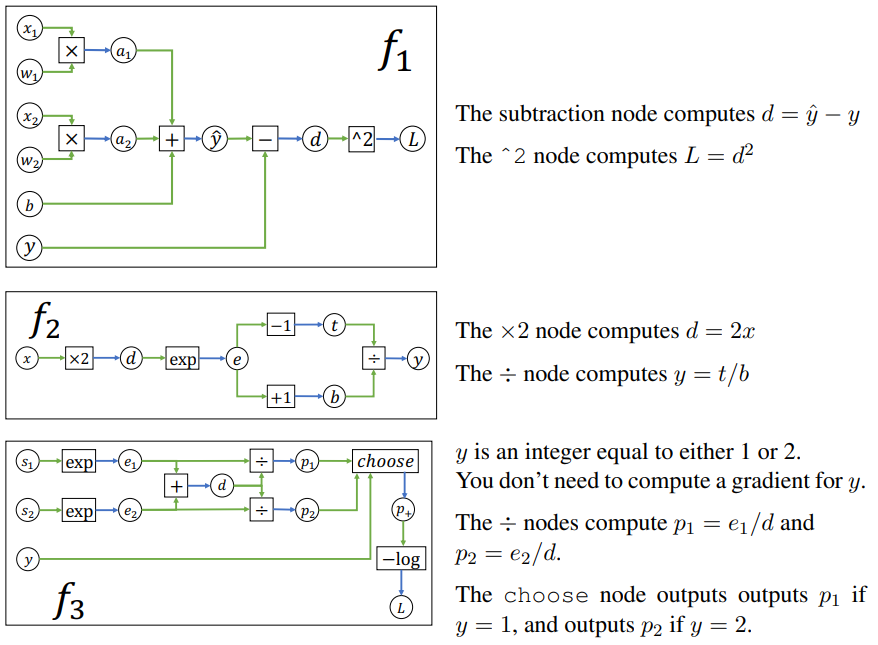

<font color='red'>[CODE]</font> **Task 1(a)** Implement the forward and backward passes for the three computational graphs below. (15 pts)

In [3]:
import math


"""
Defines forward and backward passes through different computational graphs.

Students should complete the implementation of all functions in this file.
"""


def f1(x1, w1, x2, w2, b, y):
    """
    Computes the forward and backward pass through the computational graph f1
    from the homework PDF.

    A few clarifications about the graph:
    - The subtraction node in the graph computes d = y_hat - y
    - The ^2 node squares its input

    Inputs:
    - x1, w1, x2, w2, b, y: Python floats

    Returns a tuple of:
    - L: Python scalar giving the output of the graph
    - grads: A tuple (grad_x1, grad_w1, grad_x2, grad_w2, grad_b, grad_y)
    giving the derivative of the output L with respect to each input.
    """
    # Forward pass: compute loss
    ###########################################################################
    # TODO: Implement the forward pass for the computational graph f1 shown   #
    # in the homework description. Store the loss in the variable L.          #
    ###########################################################################
    a1 = w1 * x1
    a2 = w2 * x2
    y_hat = a1 + a2 + b
    d = y_hat - y
    L = d ** 2
    ###########################################################################
    #                              END OF YOUR CODE                           #
    ###########################################################################

    # Backward pass: compute gradients
    ###########################################################################
    # TODO: Implement the backward pass for the computational graph f1 shown  #
    # in the homework description. Store the gradients for each input         #
    # variable in the corresponding grad variagbles defined above.            #
    ###########################################################################
    grad_L = 1
    grad_d = 2 * d * grad_L
    grad_y = -1 * grad_d
    grad_y_hat = 1 * grad_d
    grad_b = 1 * grad_y_hat
    grad_a1 = 1 * grad_y_hat
    grad_a2 = 1 * grad_y_hat
    grad_x1 = w1 * grad_a1
    grad_x2 = w2 * grad_a2
    grad_w1 = x1 * grad_a1
    grad_w2 = x2 * grad_a2
    ###########################################################################
    #                              END OF YOUR CODE                           #
    ###########################################################################

    grads = (grad_x1, grad_w1, grad_x2, grad_w2, grad_b, grad_y)
    return L, grads


def f2(x):
    """
    Computes the forward and backward pass through the computational graph f2
    from the homework PDF.

    A few clarifications about this graph:
    - The "x2" node multiplies its input by the constant 2
    - The "+1" and "-1" nodes add or subtract the constant 1
    - The division node computes y = t / b

    Inputs:
    - x: Python float

    Returns a tuple of:
    - y: Python float
    - grads: A tuple (grad_x,) giving the derivative of the output y with
      respect to the input x
    """
    # Forward pass: Compute output
    ###########################################################################
    # TODO: Implement the forward pass for the computational graph f2 shown   #
    # in the homework description. Store the output in the variable y.        #
    ###########################################################################
    d = 2 * x
    e = math.exp(d)
    e1 = e
    e2 = e
    t = e1 - 1
    b = e2 + 1
    y = t / b
    ###########################################################################
    #                              END OF YOUR CODE                           #
    ###########################################################################

    # Backward pass: Compute gradients
    ###########################################################################
    # TODO: Implement the backward pass for the computational graph f2 shown  #
    # in the homework description. Store the gradients for each input         #
    # variable in the corresponding grad variagbles defined above.            #
    ###########################################################################
    grad_y = 1
    grad_t = (1 / b) * grad_y
    grad_b = (-t / b**2) * grad_y
    grad_e1 = 1 * grad_t
    grad_e2 = 1 * grad_b
    grad_e = grad_e1 + grad_e2
    grad_d = math.exp(d) * grad_e
    grad_x = 2 * grad_d
    ###########################################################################
    #                              END OF YOUR CODE                           #
    ###########################################################################

    return y, (grad_x,)


def f3(s1, s2, y):
    """
    Computes the forward and backward pass through the computational graph f3
    from the homework PDF.

    A few clarifications about the graph:
    - The input y is an integer with y == 1 or y == 2; you do not need to
      compute a gradient for this input.
    - The division nodes compute p1 = e1 / d and p2 = e2 / d
    - The choose(p1, p2, y) node returns p1 if y is 1, or p2 if y is 2.

    Inputs:
    - s1, s2: Python floats
    - y: Python integer, either equal to 1 or 2

    Returns a tuple of:
    - L: Python scalar giving the output of the graph
    - grads: A tuple (grad_s1, grad_s2) giving the derivative of the output L
    with respect to the inputs s1 and s2.
    """
    assert y == 1 or y == 2
    # Forward pass: Compute loss
    ###########################################################################
    # TODO: Implement the forward pass for the computational graph f3 shown   #
    # in the homework description. Store the loss in the variable L.          #
    ###########################################################################
    e1 = math.exp(s1)
    e1_1 = e1
    e1_2 = e1
    e2 =  math.exp(s2)
    e2_1 = e2
    e2_2 = e2
    d = e1_1 + e2_1
    d1 = d
    d2 = d
    p1 = e1_2 / d1
    p2 = e2_2 / d2
    p_plus = p1 if y == 1 else p2
    L = -math.log(p_plus)
    ###########################################################################
    #                              END OF YOUR CODE                           #
    ###########################################################################

    # Backward pass: Compute gradients
    ###########################################################################
    # TODO: Implement the backward pass for the computational graph f3 shown  #
    # in the homework description. Store the gradients for each input         #
    # variable in the corresponding grad variagbles defined above. You do not #
    # need to compute a gradient for the input y since it is an integer.      #
    #                                                                         #
    # HINT: You may need an if statement to backprop through the choose node  #
    ###########################################################################
    grad_L = 1
    grad_p_plus = (-1/p_plus) * grad_L
    grad_p1 = 1 * grad_p_plus if y == 1 else 0
    grad_p2 = 1 * grad_p_plus if y == 2 else 0
    grad_e1_2 = (1 / d1) * grad_p1
    grad_e2_2 = (1 / d2) * grad_p2
    grad_d1 = (-e1_2 / d1 ** 2) * grad_p1
    grad_d2 = (-e2_2 / d2 ** 2) * grad_p2
    grad_d = grad_d1 + grad_d2
    grad_e1_1 = 1 * grad_d
    grad_e2_1 = 1 * grad_d
    grad_e1 = grad_e1_1 + grad_e1_2
    grad_e2 = grad_e2_1 + grad_e2_2
    grad_s1 = math.exp(s1) * grad_e1
    grad_s2 = math.exp(s2) * grad_e2
    ###########################################################################
    #                              END OF YOUR CODE                           #
    ###########################################################################

    grads = (grad_s1, grad_s2)
    return L, grads


def f3_y1(s1, s2):
    """
    Helper function to compute f3 in the case where y = 1

    Inputs:
    - s1, s2: Same as f3

    Outputs: Same as f3
    """
    return f3(s1, s2, y=1)


def f3_y2(s1, s2):
    """
    Helper function to compute f3 in the case where y = 2

    Inputs:
    - s1, s2: Same as f3

    Outputs: Same as f3
    """
    return f3(s1, s2, y=2)

In [4]:
## CHECK YOUR ABOVE IMPLEMENTATION USING THIS BLOCK. JUST HIT THE RUN BUTTON AND IT WILL DO THE MAGIC FOR YOU.

def save_outputs(functions, filename, samples_per_fn=100):
    if os.path.isfile(filename):
        msg = f"Output file {filename} already exists, quitting"
        raise ValueError(msg)
    data = {}
    for name, f, _ in functions:
        print(f"Generating data for function {name}")
        num_inputs = len(signature(f).parameters)
        inputs, outputs = [], []
        for _ in range(samples_per_fn):
            xs = tuple(random.random() for _ in range(num_inputs))
            y, _grads = f(*xs)
            inputs.append(xs)
            outputs.append(y)
        data[name] = {'inputs': inputs, 'outputs': outputs}

    print(f"Saving output data to {filename}")
    with open(filename, 'wb') as f:
        pickle.dump(data, f)


def check_outputs(functions, filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)

    all_passed = True
    for name, f, tol in functions:
        print(f"Checking outputs for function {name}")
        if name not in data:
            msg = f"Data for function {name} not found in file {filename}"
            raise ValueError(msg)
        inputs = data[name]['inputs']
        outputs = data[name]['outputs']
        assert len(inputs) == len(outputs)
        passed = True
        for xs, y in zip(inputs, outputs):
            y_pred, _grads = f(*xs)
            if y_pred is None:
                print('  Forward pass not implemented')
                print('  Output check failed!')
                passed = False
                break
            diff = abs(y - y_pred)
            if diff > tol:
                print(f'  Inputs: {xs}')
                print(f'  Expected output: {y}')
                print(f'  Actual output  : {y_pred}')
                print(f'  Difference: {diff}')
                print(f'  Output check failed!')
                passed = False
                break
        if passed:
            print("  Output check passed!")
        else:
            all_passed = False

    if all_passed:
        print("All output checks passed!")
    else:
        print("At least one output check failed")
    print()


def numeric_gradient(f, xs, h=1e-4):
    """
    Compute a numeric gradient for a function at a point

    Inputs:
    - f: The function for which to compute a numeric gradient. It should have
      the signature:

      y, grads = f(x1, x2, ..., xN)

      where y and all x are floats.
    - xs: A tuple of length N of floats giving the point at which to compute
      the gradient of f.
    - h: Float giving the step size to use when computing the gradient

    Returns:
    A tuple grads of length N, where grads[i] is the numeric approximation of
    the gradient of y with respect to xs[i].
    """
    grads = []
    xs = list(xs)
    for i, x in enumerate(xs):
        xs[i] = x - h
        y1, _ = f(*xs)
        if y1 is None:
            raise ValueError("Forward pass not implemented")
        xs[i] = x + h
        y2, _ = f(*xs)
        xs[i] = x
        g = (y2 - y1) / (2.0 * h)
        grads.append(g)
    return tuple(grads)


def gradcheck(f, tolerance=1e-10, trials=100000):
    num_inputs = len(signature(f).parameters)
    for _ in range(trials):
        xs = tuple(random.random() for _ in range(num_inputs))
        L, grads = f(*xs)
        try:
            numeric_grads = numeric_gradient(f, xs)
        except ValueError as e:
            print(f'  {e}')
            return False
        max_diff = 0.0
        for g1, g2 in zip(grads, numeric_grads):
            if g1 is None:
                print(f"  Got analytic gradient {grads}")
                print(f"  Backward pass not implemented")
                return False
            diff = abs(g1 - g2)
            max_diff = max(diff, max_diff)
        if max_diff > tolerance:
            print(f"  Analytic gradient: {grads}")
            print(f"  Numeric gradient:  {numeric_grads}")
            print(f"  Max difference: {max_diff}")
            print(f"  Tolerance: {tolerance}")
            return False
    return True


def check_grads(functions):
    all_passed = True
    for name, f, tolerance in functions:
        if len(signature(f).parameters) == 0:
            continue
        print(f"Running gradcheck for {name}")
        passed = gradcheck(f, tolerance)
        if passed:
            print("  Gradcheck passed!")
        else:
            all_passed = False
            print("  Gradcheck failed!")
    if all_passed:
        print("All gradchecks passed!")
    else:
        print("At least one gradcheck failed")

# You can modify this line to check any specific function
REQUIRED_FUNCTIONS = [
    ("f1", f1, 1e-10),
    ("f2", f2, 1e-8),
    ("f3 (y=1)", f3_y1, 1e-8),
    ("f3 (y=2)", f3_y2, 1e-8),
]

check_outputs(REQUIRED_FUNCTIONS, os.path.join(source, 'backprop/backprop-data.pkl'))
check_grads(REQUIRED_FUNCTIONS)

Checking outputs for function f1
  Output check passed!
Checking outputs for function f2
  Output check passed!
Checking outputs for function f3 (y=1)
  Output check passed!
Checking outputs for function f3 (y=2)
  Output check passed!
All output checks passed!

Running gradcheck for f1
  Gradcheck passed!
Running gradcheck for f2
  Gradcheck passed!
Running gradcheck for f3 (y=1)
  Gradcheck passed!
Running gradcheck for f3 (y=2)
  Gradcheck passed!
All gradchecks passed!


## Task 2: Write your own computational graph [10 points]

<font color='green'>[DATA]</font> **Task 2(a): In your submission, include a drawing of computational graph for any function of your choosing. It should have at least five operators. (You can hand-draw the graph and include a picture of it in your submission.)** (10 pts)

A sample computational graph:

![](https://drive.google.com/uc?id=1nsW_pdwPrIIN4IVb5LP7DbKsE0F82yFE)

# Exercise 2: *Fully-Connected Neural Networks*

In this question you will implement and train a fully-connected neural network to classify images.

**[NOTE] For this question you cannot use any deep learning libraries such as PyTorch or TensorFlow.**


## Task 3: Modular Backprop API [15 points]


In the previous questions on this assignment you used backpropagation to compute gradients by implementing monolithic functions that combine the forward and backward passes for an entire graph. As we’ve discussed in lecture, this monolithic approach to backpropagation isn’t very modular – if you want to change some component of your graph (new loss fucntion, different activation function, etc) then you need to write a new function from scratch.


Rather than using monolithic backpropagation implementations, most modern deep learning frameworks use a modular API for backpropagation. Each primitive operator that will be used in a computational graph implements a forward function that computes the operator’s output from its inputs, and a backward function that receives upstream gradients and computes downstream gradients. Deep learning libraries like PyTorch or TensorFlow provide many predefined operators with corresponding forward and backward functions. 

To gain experience with this modular approach to backpropagation, you will implement your own miniature modular deep learning framework. The code block below defines forward and backward functions for several common operators that we’ll need to implement our own neural networks. 


Each forward function receives one or more numpy arrays as input, and returns: 

(1) A numpy array giving the output of the operator, and 

(2) a cache object containing values that will be needed during the backward
pass. 

The backward function receives a numpy array of upstream gradients along with the cache object, and must compute and return downstream gradients for each of the inputs passed to the forward function.


Along with forward and backward functions for operators to be used in the middle of a computational graph, we also define functions for loss functions that will be used to compute the final output from a graph. These loss functions receive an input and return both the loss and the gradient of the loss with respect to the input. 

This modular API allows us to implement our operators and loss functions once, and reuse them in different computational graphs. For example, we can implement a full forward and backward pass to compute the loss and gradients for linear regression in just a few lines of code:



```python

from layers import fc_forward, fc_backward, l2_loss
def linear_regression_step(X, y, W, b):
    y_pred, cache = fc_forward(X, W, b)
    loss, grad_y_pred = l2_loss(y_pred, y)
    grad_X, grad_W, grad_b = fc_backward(grad_y_pred, cache)
    return grad_W, grad_b
```



In the code block below, you need to complete the implementation of the following function:


(a) <ins>**Fully-connected layer**</ins>: `fc_forward` and `fc_backward`.


(b) <ins>**ReLU nonlinearity**</ins>: `relu_forward` and `relu_backward` which applies the function $ReLU(x_i) = max(0, x)$ elementwise to its input.


(c) <ins>**Softmax Loss Function**</ins>: `softmax_loss`. The softmax loss function receives a matrix $x ∈ R^{N×C}$ giving a batch of classification scores for $N$ elements, where for each element we have a score for each of $C$ different categories. The softmax loss function first converts the scores into a set of $N$ probability
distributions over the elements, defined as:

\begin{align}
p_{i,c} = \frac{exp(x_{i,c})}{\sum^C_{j=1} exp(x_{i,j})}
\end{align}

The output of the softmax loss is then given by

\begin{align}
L = −\frac{1}{N}\sum^N_{i=1} log(p_{i,yi})
\end{align}

where $y_i ∈ {1, . . . , C}$ is the ground-truth label for the ith element.


A naive implementation of the softmax loss can suffer from numeric instability. More specifically, large values in $x$ can cause overflow when computing $exp$. To avoid this, we can instead compute the softmax probabilities as:

\begin{align}
p_{i,c}=\frac{exp(x_{i,c} − M_i)}{\sum^C_{j=1} exp(x_{i,j} − M_i)}
\end{align}

where $M_i = max_c x_{i,c}$. This ensures that all values we exponentiate are $< 0$, avoiding any potential overflow. It’s not hard to see that these two formulations are equivalent, since

\begin{align}
\frac{exp(x_{i,c} − M_i)}{\sum^C_{j=1} exp(x_{i,j} − M_i)} = \frac{exp(x_{i,c})exp(-M_i)}{\sum^C_{j=1} exp(x_{i,j}) exp(M_i)} = \frac{exp(x_{i,c})}{\sum^C_{j=1} exp(x_{i,j})}
\end{align}


**[Important] Your softmax implementation should use this max-subtraction trick for numeric stability. You can run the function `check_softmax_stability` (it will be two code blocks below) to check the numeric stability of your softmax loss implementation.**


(d) <ins>**L2 Regularization**</ins>: l2 regularization which implements the L2 regularization loss

\begin{align}
L(W)=\frac{\lambda}{2}||W||^2=\frac{\lambda}{2}||W||^2=\frac{\lambda}{2}\sum_i W_i^2
\end{align}

where the sum ranges over all scalar elements of the weight matrix $W$ and $λ$ is a hyperparameter controlling the regularization strength.


After implementing all the methods mention above, you can use the script in the block below the code block called `gradcheck layers block` to perform numeric gradient checking on your implementations. The difference between all numeric and analytic gradients should be less than $10^{−9}$.


Keep in mind that numeric gradient checking does not check whether you’ve correctly implemented the forward pass; it only checks whether the backward pass you’ve implemented actually computes the gradient of the forward pass that you implemented.

<font color='red'>[CODE]</font> **Task 3(a)** Implement the functions `fc_forward`, `fc_backward`, `relu_forward`, `relu_backward`, `softmax_loss` and `l2_regularization`.  (50 pts)

In [5]:
def fc_forward(x, w, b):
    """
    Computes the forward pass for a fully-connected layer.

    The input x has shape (N, Din) and contains a minibatch of N
    examples, where each example x[i] has shape (Din,).

    Inputs:
    - x: A numpy array of shape (N, Din) giving input data
    - w: A numpy array of shape (Din, Dout) giving weights
    - b: A numpy array of shape (Dout,) giving biases

    Returns a tuple of:
    - out: output, of shape (N, Dout)
    - cache: (x, w, b)
    """
    out = None
    ###########################################################################
    # TODO: Implement the forward pass. Store the result in out.              #
    ###########################################################################
    out = x.reshape(x.shape[0], -1) @ w + b
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b)
    return out, cache


def fc_backward(grad_out, cache):
    """
    Computes the backward pass for a fully-connected layer.

    Inputs:
    - grad_out: Numpy array of shape (N, Dout) giving upstream gradients
    - cache: Tuple of:
      - x: A numpy array of shape (N, Din) giving input data
      - w: A numpy array of shape (Din, Dout) giving weights
      - b: A numpy array of shape (Dout,) giving biases

    Returns a tuple of downstream gradients:
    - grad_x: A numpy array of shape (N, Din) of gradient with respect to x
    - grad_w: A numpy array of shape (Din, Dout) of gradient with respect to w
    - grad_b: A numpy array of shape (Dout,) of gradient with respect to b
    """
    x, w, b = cache
    grad_x, grad_w, grad_b = None, None, None
    ###########################################################################
    # TODO: Implement the backward pass for the fully-connected layer         #
    ###########################################################################
    grad_x = (grad_out @ w.T).reshape(x.shape)
    grad_w = x.reshape(x.shape[0], -1).T @ grad_out
    grad_b = np.sum(grad_out, axis=0)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return grad_x, grad_w, grad_b


def relu_forward(x):
    """
    Computes the forward pass for the Rectified Linear Unit (ReLU) nonlinearity

    Input:
    - x: A numpy array of inputs, of any shape

    Returns a tuple of:
    - out: A numpy array of outputs, of the same shape as x
    - cache: x
    """
    out = None
    ###########################################################################
    # TODO: Implement the ReLU forward pass.                                  #
    ###########################################################################
    out = np.maximum(0, x)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = x
    return out, cache


def relu_backward(grad_out, cache):
    """
    Computes the backward pass for a Rectified Linear Unit (ReLU) nonlinearity

    Input:
    - grad_out: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - grad_x: Gradient with respect to x
    """
    grad_x, x = None, cache
    ###########################################################################
    # TODO: Implement the ReLU backward pass.                                 #
    ###########################################################################
    grad_x = grad_out * (x > 0)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return grad_x


def l2_loss(x, y):
    """
    Computes the loss and gradient of L2 loss.

    loss = 0.5 * sum_i (x_i - y_i)**2 / N

    Inputs:
    - x: Input data, of shape (N, D)
    - y: Output data, of shape (N, D)

    Returns a tuple of:
    - loss: Scalar giving the loss
    - grad_x: Gradient of the loss with respect to x
    """
    N = x.shape[0]
    diff = x - y
    loss = 0.5 * np.sum(diff * diff) / N
    grad_x = diff / N
    return loss, grad_x


def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax (cross-entropy) loss function.

    Inputs:
    - x: Numpy array of shape (N, C) giving predicted class scores, where
      x[i, c] gives the predicted score for class c on input sample i
    - y: Numpy array of shape (N,) giving ground-truth labels, where
      y[i] = c means that input sample i has ground truth label c, where
      0 <= c < C.

    Returns a tuple of:
    - loss: Scalar giving the loss
    - grad_x: Numpy array of shape (N, C) giving the gradient of the loss with
      with respect to x
    """
    loss, grad_x = None, None
    ###########################################################################
    # TODO: Implement softmax loss                                            #
    ###########################################################################
    x_whitened = x - np.max(x, axis=1, keepdims=True)
    M = np.sum(np.exp(x_whitened), axis=1, keepdims=True)
    log_probs = x_whitened - np.log(M)
    probs = np.exp(log_probs)
    N = x.shape[0]
    loss = -np.sum(log_probs[np.arange(N), y]) / N
    grad_x = probs.copy()
    grad_x[np.arange(N), y] -= 1
    grad_x /= N
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return loss, grad_x


def l2_regularization(w, reg):
    """
    Computes loss and gradient for L2 regularization of a weight matrix:

    loss = (reg / 2) * sum_i w_i^2

    Where the sum ranges over all elements of w.

    Inputs:
    - w: Numpy array of any shape
    - reg: float giving the regularization strength

    Returns:
    """
    loss, grad_w = None, None
    ###########################################################################
    # TODO: Implement L2 regularization.                                      #
    ###########################################################################
    w = w.copy()
    loss = (w**2).sum() * reg
    grad_w = w*2 * reg
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return loss, grad_w

In [9]:
# BLOCK NAME: GRADCHECK LAYERS BLOCK
# BRIEF: Numeric Gradient Checking

# UTILITY METHODS

def numeric_gradient(f, x, h=1e-6):
    """
    Computes a numeric gradient of a function that takes an array argument.

    Inputs:
    - f: A function of the form y = f(x) where x is a numpy array and y is
      a Python float
    - x: The point at which to compute a numeric gradient
    - h: The step size to use for computing the numeric gradient

    Returns:
    - grad_x: Numpy array of the same shape as x giving a numeric approximation
      to the gradient of f at the point x.
    """
    grad = np.zeros_like(x)
    grad_flat = grad.reshape(-1)
    x_flat = x.reshape(-1)
    for i in range(grad_flat.shape[0]):
        old_val = x_flat[i]
        x_flat[i] = old_val + h
        pos = f(x)
        x_flat[i] = old_val - h
        neg = f(x)
        grad_flat[i] = (pos - neg) / (2.0 * h)
        x_flat[i] = old_val
    return grad


def numeric_backward(f, x, grad_y, h=1e-6):
    """
    Computes a numeric backward pass for a function that inputs and outputs a
    numpy array.

    Inputs:
    - f: A function of the form y = f(x) where x and y are both numpy arrays
      of any shape.
    - x: A numpy array giving the point at which to compute the numeric
      backward pass.
    - grad_y: A numpy array of the same shape as f(x) giving upstream gradients
    - h: The step size to use for the numeric derivative

    Returns:
    - grad_x: A numpy array with the same shape as x giving a numeric
      approximation to a backward pass through f.
    """
    grad_x = np.zeros_like(x)
    grad_x_flat = grad_x.reshape(-1)
    x_flat = x.reshape(-1)
    for i in range(x_flat.shape[0]):
        old_val = x_flat[i]
        x_flat[i] = old_val + h
        pos = f(x)
        x_flat[i] = old_val - h
        neg = f(x)
        local_grad = (pos - neg) / (2.0 * h)
        grad_x_flat[i] = np.sum(local_grad * grad_y)
        x_flat[i] = old_val
    return grad_x


def check_accuracy(model, sampler):
    num_correct, num_samples = 0, 0
    for X_batch, y_batch in sampler:
        y_pred = model.predict(X_batch)
        num_correct += (y_pred == y_batch).sum()
        num_samples += y_pred.shape[0]
    acc = 100 * num_correct / num_samples
    return acc


## CHECKING METHODS

def gradcheck_fc():
    print('Running numeric gradient check for fc')
    N, Din, Dout = 3, 4, 5
    x = np.random.randn(N, Din)
    w = np.random.randn(Din, Dout)
    b = np.random.randn(Dout)

    y, cache = fc_forward(x, w, b)
    if y is None:
        print('  Forward pass is not implemented!')
        return

    grad_y = np.random.randn(*y.shape)
    grad_x, grad_w, grad_b = fc_backward(grad_y, cache)
    if grad_x is None or grad_w is None or grad_b is None:
        print('  Backward pass is not implemented!')
        return

    fx = lambda _: fc_forward(_, w, b)[0]
    grad_x_numeric = numeric_backward(fx, x, grad_y)
    max_diff = np.abs(grad_x - grad_x_numeric).max()
    print('  grad_x difference: ', max_diff)

    fw = lambda _: fc_forward(x, _, b)[0]
    grad_w_numeric = numeric_backward(fw, w, grad_y)
    max_diff = np.abs(grad_w - grad_w_numeric).max()
    print('  grad_w difference: ', max_diff)

    fb = lambda _: fc_forward(x, w, _)[0]
    grad_b_numeric = numeric_backward(fb, b, grad_y)
    max_diff = np.abs(grad_b - grad_b_numeric).max()
    print('  grad_b difference: ', max_diff)


def gradcheck_relu():
    print('Running numeric gradient check for relu')
    N, Din = 4, 5
    x = np.random.randn(N, Din)

    y, cache = relu_forward(x)
    if y is None:
        print('  Forward pass is not implemented!')
        return

    grad_y = np.random.randn(*y.shape)
    grad_x = relu_backward(grad_y, cache)
    if grad_x is None:
        print('  Backward pass is not implemented!')
        return

    f = lambda _: relu_forward(_)[0]
    grad_x_numeric = numeric_backward(f, x, grad_y)
    max_diff = np.abs(grad_x - grad_x_numeric).max()
    print('  grad_x difference: ', max_diff)


def gradcheck_softmax():
    print('Running numeric gradient check for softmax loss')
    N, C = 4, 5
    x = np.random.randn(N, C)
    y = np.random.randint(C, size=(N,))
    loss, grad_x = softmax_loss(x, y)
    if loss is None or grad_x is None:
        print('  Softmax not implemented!')
        return

    f = lambda _: softmax_loss(_, y)[0]
    grad_x_numeric = numeric_gradient(f, x)
    max_diff = np.abs(grad_x - grad_x_numeric).max()
    print('  grad_x difference: ', max_diff)


def gradcheck_l2_regularization():
    print('Running numeric gradient check for L2 regularization')
    Din, Dout = 3, 4
    reg = 0.1
    w = np.random.randn(Din, Dout)
    loss, grad_w = l2_regularization(w, reg)
    if loss is None or grad_w is None:
        print('  L2 regularization not implemented!')
        return

    f = lambda _: l2_regularization(_, reg)[0]
    grad_w_numeric = numeric_gradient(f, w)
    max_diff = np.abs(grad_w - grad_w_numeric).max()
    print('  grad_w difference: ', max_diff)


## This Will run the checks on your implementation
gradcheck_fc()
gradcheck_relu()
gradcheck_softmax()
gradcheck_l2_regularization()

Running numeric gradient check for fc
  grad_x difference:  3.8160308246659724e-10
  grad_w difference:  2.5986731516658423e-10
  grad_b difference:  1.0652745352501825e-10
Running numeric gradient check for relu
  grad_x difference:  8.305911514128184e-11
Running numeric gradient check for softmax loss
  grad_x difference:  1.3826104150460594e-10
Running numeric gradient check for L2 regularization
  grad_w difference:  5.885641973790712e-11


In [10]:
# BLOCK NAME: SOFTMAX STABILITY
# BRIEF: Check the numeric stability of your softmax loss implementation

def check_softmax_stabilty():
    big = 1e3
    x = np.array([
          [big, 0, -big],  # noqa: E126
          [-big, big, 0],  # noqa: E126
          [0, -big, big],  # noqa: E126
        ])                 # noqa: E126
    y = np.array([0, 1, 2])
    loss, _ = softmax_loss(x, y)
    if loss is None:
        print('You have not yet implemented softmax_loss')
        return
    print('Input scores:')
    print(x)
    print(f'Input labels: {y}')
    print(f'Output loss: {loss}')
    if np.isnan(loss):
        print('Your softmax_loss gave a NaN with big input values.')
        print('Did you forget to implement the max-subtraction trick?')
    else:
        print('It seems like your softmax_loss is numerically stable!')

check_softmax_stabilty()

Input scores:
[[ 1000.     0. -1000.]
 [-1000.  1000.     0.]
 [    0. -1000.  1000.]]
Input labels: [0 1 2]
Output loss: -0.0
It seems like your softmax_loss is numerically stable!


## Task 4: Implement a Two-Layer Network [15 points]

Your next task is to implement a two-layer fully-connected neural network using the modular forward and backward functions that you just implemented.

In addition to using a modular API for individual layers, we will also adopt a modular API for classification models as well. This will allow us to implement multiple different types of image classification models, but train and test them all with the same training logic.


The block below defines a base class `Classifier` for image classification models. You don’t need to implement anything in this block, but you should read through it to familiarize yourself with the API. In order to define your own type of image classification model, you’ll need to define a subclass of `Classifier` that implements the `parameters`, `forward`, and `backward` methods.

In [11]:
# BLOCK NAME: Classifier
# BRIEF: Contains base class implementation


class Classifier:
    """
    A base class for an image classification model.

    Subclasses should override the following methods:
    - parameters
    - forward
    - backward
    """
    def parameters(self):
        """
        Returns a dictionary of all learnable parameters for this model.

        The keys of the dictionary should be strings giving a human-readable
        name for each parameter, and the values should be numpy arrays of the
        parameters.

        Subclasses should override this.
        """
        raise NotImplementedError

    def forward(self, X):
        """
        Computes the forward pass of the model to compute classification scores
        over C categories giving a minibatch of N inputs.

        Subclasses should override this.

        Inputs:
        - X: A numpy array of shape (N, D) giving input images to classify

        Returns a tuple of:
        - scores: A numpy array of shape (N, C) giving classification scores
        - cache: An object containing data that will be needed during backward
        """
        raise NotImplementedError

    def backward(self, grad_scores, cache):
        """
        Computes the backward pass of the model to compute the gradient of the
        loss with respect to all parameters of the model.

        Subclasses should override this.

        Inputs:
        - grad_scores: A numpy array of shape (N, C) giving upstream gradients
          of the loss with respect to the classification scores predicted by
          the forward pass of this model
        - cache: A cache object created by the forward pass of this model

        Returns:
        - grads: A dictionary of gradients for all learnable parameters of this
          model. The grads dict should have the same keys as the dict returned
          by self.parameters(), and grads[k] should be a numpy array of the
          same shape as self.parameters()[k] giving the gradient of the loss
          with respect to that parameter.
        """
        raise NotImplementedError

    def predict(self, X):
        """
        Make predictions for a batch of images.

        Inputs:
        - X: A numpy array of shape (N, D) giving input images to classify

        Returns:
        - y_pred: A numpy array of shape (N,) where each element is an integer
          in the range 0 <= y_pred[i] < C giving the predicted category for
          the input X[i].
        """
        scores, _ = self.forward(X)
        y_pred = scores.argmax(axis=1)
        return y_pred

    def save(self, filename):
        """
        Save the parameters of this model to disk.

        Inputs:
        - filename: Path to the file where this model should be saved
        """
        params = self.parameters()
        with open(filename, 'wb') as f:
            pickle.dump(params, f)

    @classmethod
    def load(cls, filename):
        """
        Load the parameters of this model from disk.

        This copies data in-place into the ndarrays returned by the parameters
        method, so this will only work properly for subclasses if:
        (1) The subclass __init__ method can be called without arguments
        (2) The ndarrays returned by the parameters method are sufficient for
            capturing the state of the model.

        Example usage:
        model = TwoLayerNet(...)
        model.save('checkpoint.pkl')
        model2 = TwoLayerNet.load('checkpoint.pkl')

        Inputs:
        - filename: Path to the file from which parameters should be read

        Returns:
        - A Classifier subclass loaded from the file
        """
        model = cls()
        params = model.parameters()
        with open(filename, 'rb') as f:
            saved_params = pickle.load(f)
        for k, param in params.items():
            saved_param = saved_params[k]
            param.resize(saved_param.shape, refcheck=False)
            param[:] = saved_param
        return model

In the block *Linear Classifier*, we’ve implemented a `LinearClassifier` class that subclasses `Classifier` and implements a linear classification model using the modular layer API from the previous task together with the modular classifier API. Again, you don’t need to implement anything in this block but you should read through it to get a sense for how to implement your own classifiers.

In [12]:
# BLOCK NAME: Linear Classifier
# BRIEF: Contains implementation of LinearClassifier

class LinearClassifier(Classifier):
    def __init__(self, input_dim=3072, num_classes=10, weight_scale=1e-3):
        """
        Initialize a new linear classifier.

        Inputs:
        - input_dim: The number of dimensions in the input.
        - num_classes: The number of classes over which to classify
        - weight_scale: The weights of the model will be initialized from a
          Gaussian distribution with standard deviation equal to weight_scale.
          The bias of the model will always be initialized to zero.
        """
        self.W = weight_scale * np.random.randn(input_dim, num_classes)
        self.b = np.zeros(num_classes)

    def parameters(self):
        params = {
            'W': self.W,
            'b': self.b,
        }
        return params

    def forward(self, X):
        scores, cache = fc_forward(X, self.W, self.b)
        return scores, cache

    def backward(self, grad_scores, cache):
        grad_X, grad_W, grad_b = fc_backward(grad_scores, cache)
        grads = {
            'W': grad_W,
            'b': grad_b,
        }
        return grads

Now it’s your turn! In the block below, we’ve provided the start to an implementation of a `TwoLayerNet` class that implements a two-layer neural network (with ReLU nonlinearity).

<font color='red'>[CODE]</font> **Task 4(a): Complete the implementation of the `TwoLayerNet` class.** Your implementations for the `forward` and `backward` methods should use the modular forward and backward functions that you implemented in the previous task. (15 pts)

In [13]:
class TwoLayerNet(Classifier):
    """
    A neural network with two layers, using a ReLU nonlinearity on its one
    hidden layer. That is, the architecture should be:

    input -> FC layer -> ReLU layer -> FC layer -> scores
    """
    def __init__(self, input_dim=3072, num_classes=10, hidden_dim=512,
                 weight_scale=1e-3):
        """
        Initialize a new two layer network.

        Inputs:
        - input_dim: The number of dimensions in the input.
        - num_classes: The number of classes over which to classify
        - hidden_dim: The size of the hidden layer
        - weight_scale: The weight matrices of the model will be initialized
          from a Gaussian distribution with standard deviation equal to
          weight_scale. The bias vectors of the model will always be
          initialized to zero.
        """
        #######################################################################
        # TODO: Initialize the weights and biases of a two-layer network.     #
        #######################################################################
        self.W1 = np.random.normal(0, weight_scale, (input_dim, hidden_dim))
        self.W2 = np.random.normal(0, weight_scale, (hidden_dim, num_classes))
        self.b1 = np.zeros(hidden_dim)
        self.b2 = np.zeros(num_classes)
        #######################################################################
        #                          END OF YOUR CODE                           #
        #######################################################################

    def parameters(self):
        params = None
        #######################################################################
        # TODO: Build a dict of all learnable parameters of this model.       #
        #######################################################################
        params = {
            'W1': self.W1,
            'W2': self.W2,
            'b1': self.b1,
            'b2': self.b2,
        }
        #######################################################################
        #                          END OF YOUR CODE                           #
        #######################################################################
        return params

    def forward(self, X):
        scores, cache = None, None
        #######################################################################
        # TODO: Implement the forward pass to compute classification scores   #
        # for the input data X. Store into cache any data that will be needed #
        # during the backward pass.                                           #
        #######################################################################
        a, cache1 = fc_forward(X, self.W1, self.b1)
        relu_a, cache2 = relu_forward(a)
        scores, cache3 = fc_forward(relu_a, self.W2, self.b2)
        cache = (cache1, cache2, cache3)
        #######################################################################
        #                          END OF YOUR CODE                           #
        #######################################################################
        return scores, cache

    def backward(self, grad_scores, cache):
        grads = None
        #######################################################################
        # TODO: Implement the backward pass to compute gradients for all      #
        # learnable parameters of the model, storing them in the grads dict   #
        # above. The grads dict should give gradients for all parameters in   #
        # the dict returned by model.parameters().                            #
        #######################################################################
        grad_relu_a, grad_relu_w2, grad_relu_b2 = fc_backward(grad_scores, cache[2])
        grad_a = relu_backward(grad_relu_a, cache[1])
        grad_x, grad_w1, grad_b1 = fc_backward(grad_a, cache[0])
        grads = {
            'W1': grad_w1,
            'W2': grad_relu_w2,
            'b1': grad_b1,
            'b2': grad_relu_b2,
        }
        #######################################################################
        #                          END OF YOUR CODE                           #
        #######################################################################
        return grads

After completing your implementation, you can run the below to perform numeric gradient checking on both the linear classifier we’ve implemented for you as well as the two-layer network you’ve just implemented. You should see errors less than $10^{-10}$ for the gradients of all parameters.

In [14]:
def classifier_numeric_backward(model, X, grad_scores):
    numeric_grads = {}
    for k, param in model.parameters().items():
        def f(_):
            old_val = param.copy()
            param[:] = _
            scores, _ = model.forward(X)
            param[:] = old_val
            return scores
        numeric_grads[k] = numeric_backward(f, param, grad_scores)
    return numeric_grads


def gradcheck_classifier(model, X, grad_scores):
    scores, cache = model.forward(X)
    grads = model.backward(grad_scores, cache)
    numeric_grads = classifier_numeric_backward(model, X, grad_scores)
    assert grads.keys() == numeric_grads.keys()
    for k, grad in grads.items():
        numeric_grad = numeric_grads[k]
        max_diff = np.abs(grad - numeric_grad).max()
        print(f'  Max diff for grad_{k}: ', max_diff)


def gradcheck_linear_classifier():
    print('Running numeric gradient check for LinearClassifier')
    N, D, C = 3, 4, 5
    model = LinearClassifier(D, C)

    X = np.random.randn(N, D)
    grad_scores = np.random.randn(N, C)

    gradcheck_classifier(model, X, grad_scores)


def gradcheck_two_layer_net():
    print('Running numeric gradient check for TwoLayerNet')
    N, D, C, H = 3, 4, 5, 6
    model = TwoLayerNet(D, C, H)

    X = np.random.randn(N, D)
    grad_scores = np.random.randn(N, C)

    gradcheck_classifier(model, X, grad_scores)

gradcheck_linear_classifier()
gradcheck_two_layer_net()

Running numeric gradient check for LinearClassifier
  Max diff for grad_W:  3.9895864389905e-13
  Max diff for grad_b:  2.5490720645393594e-13
Running numeric gradient check for TwoLayerNet
  Max diff for grad_W1:  1.2836953722228372e-15
  Max diff for grad_W2:  7.814929259275516e-16
  Max diff for grad_b1:  1.1182461207015493e-15
  Max diff for grad_b2:  4.440892098500626e-16


## Task 5: Training Two-Layer Networks [20 points]

You will train a two-layer network to perform image classification on the CIFAR-10 dataset. This dataset consists of 32 × 32 RGB images of 10 different categories. It provides 50,000 training images and 10,000 test images. Here are a few example images from the dataset:

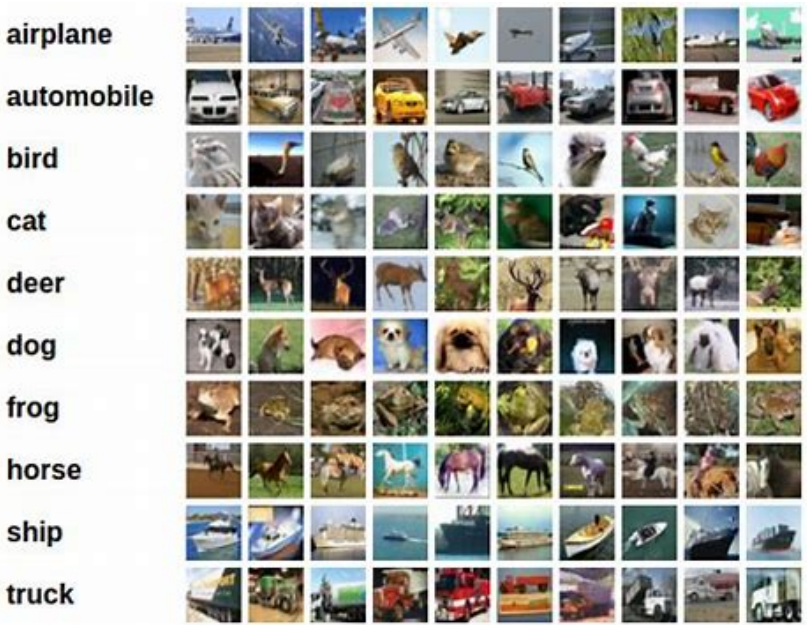

You can use the script below to download and unpack the CIFAR10 dataset.

In [15]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2022-11-27 23:41:53--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  51.7MB/s    in 3.5s    

2022-11-27 23:41:57 (47.1 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [18]:
_CIFAR_DIR = 'cifar-10-batches-py'

In [19]:
# BLOCK NAME: UTILITY METHODS TASK 5
# BRIEF: Contains methods for task 5. Make sure you run it before your implementation

class DataSampler:
    """
    A helper class to iterate through data and labels in minibatches.

    Example usage:

    X = torch.randn(N, D)
    y = torch.randn(N)
    sampler = DataSampler(X, y, batch_size=64)
    for X_batch, y_batch in sampler:
        print(X_batch.shape)  # (64, D)
        print(y_batch.shape)  # (64,)

    The loop will run for exactly one epoch over X and y -- that is, each entry
    will appear in exactly one minibatch. If the batch size does not evenly
    divide the number of elements in X and y then the last batch will be have
    fewer than batch_size elements.

    You can use a DataSampler object to iterate through the data as many times
    as you want. Each epoch will iterate through the data in a random order.
    """
    def __init__(self, X, y, batch_size):
        """
        Create a new DataSampler.

        Inputs:
        - X: Numpy array of shape (N, D)
        - y: Numpy array of shape (N,)
        - batch_size: Integer giving the number of elements for each minibatch
        """
        self.X = X
        self.y = y
        self.batch_size = batch_size

    def __iter__(self):
        """
        Iterate through the data. This returns a generator which yields tuples:
        - X_batch: Numpy array of shape (batch_size, D)
        - y_batch: Numpy array of shape (batch_size,)

        Note that when the batch size does not divide the number of elements N,
        then the last minibatch will have fewer than batch_size elements.
        """
        N = self.X.shape[0]
        perm = np.random.permutation(N)
        start, stop = 0, self.batch_size
        while start < N:
            idx = perm[start:stop]
            X_batch = self.X[idx]
            y_batch = self.y[idx]
            start += self.batch_size
            stop += self.batch_size
            yield X_batch, y_batch

    def __len__(self):
        """ Get the number of minibatches in an epoch. """
        return self.X.shape[0] // self.batch_size


def load_cifar10(data_dir=_CIFAR_DIR, num_train=10000, num_val=5000,
                 num_test=10000, seed=442):
    """
    Load and preprocess CIFAR-10 data. More specifically:

    (1) Load the raw data from disk
    (2) Shuffle the train and test sets
    (3) Subsample the training set to create train and val sets
    (4) Subsample the test set
    (5) Preprocess all images to be float32 in the range [0, 1]

    Inputs:
    - data_dir: Path to the cifar-10-batches-py directory where the CIFAR-10
      dataset has been downloaded
    - num_train: Size of training set after subsampling
    - num_val: Size of validation set after subsampling
    - num_test: Size of test set after subsampling
    - seed: Random seed to use when shuffling data

    Returns a dictionary with keys and values:
    - X_train: float32 array of shape (num_train, 3072)
    - X_val: float32 array of shape (num_val, 3072)
    - X_test: float32 array of shape (num_test, 3072)
    - y_train: int64 array of shape (num_train,) in the range [0, 10)
    - y_val: int64 array of shape (num_val,) in the range [0, 10)
    - y_test: int64 array of shape (num_test,) in the range [0, 10)
    """
    if not os.path.isdir(data_dir):
        print(f'Directory {data_dir} not found.')
        print('Did you run download_cifar.sh?')
        raise ValueError

    # Load training data
    X_train, y_train = [], []
    for i in [1, 2, 3, 4, 5]:
        filename = os.path.join(data_dir, f'data_batch_{i}')
        with open(filename, 'rb') as f:
            batch = pickle.load(f, encoding='latin1')
        X_train.append(batch['data'])
        y_train.append(batch['labels'])
    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)

    # Load test data
    filename = os.path.join(data_dir, 'test_batch')
    with open(filename, 'rb') as f:
        batch = pickle.load(f, encoding='latin1')
    X_test = batch['data']
    y_test = np.asarray(batch['labels'])

    # Shuffle the training and test sets
    rng = np.random.default_rng(seed)
    idx = rng.permutation(X_train.shape[0])
    X_train = X_train[idx]
    y_train = y_train[idx]
    idx = rng.permutation(X_test.shape[0])
    X_test = X_test[idx]
    y_test = y_test[idx]

    # Split training set into train and val
    if num_train + num_val > X_train.shape[0]:
        msg = (f'Got num_train = {num_train}, num_val = {num_val}; '
                f'must have num_train + num_val <= {X_train.shape[0]}')
        raise ValueError(msg)
    if num_test > X_test.shape[0]:
        msg = (f'Got num_test = {num_test}; '
                f'must have num_test < {X_test.shape[0]}')
        raise ValueError(msg)
    X_train_orig = X_train
    y_train_orig = y_train
    X_train = X_train_orig[:num_train]
    y_train = y_train_orig[:num_train]
    X_val = X_train_orig[num_train:(num_train + num_val)]
    y_val = y_train_orig[num_train:(num_train + num_val)]
    X_test = X_test[:num_test]
    y_test = y_test[:num_test]

    # Preprocess images: Convert to float in the range [0, 1]
    X_train = X_train.astype(np.float32) / 255.0
    X_val = X_val.astype(np.float32) / 255.0
    X_test = X_test.astype(np.float32) / 255.0

    data = {
        'X_train': X_train,
        'y_train': y_train,
        'X_val': X_val,
        'y_val': y_val,
        'X_test': X_test,
        'y_test': y_test,
    }
    return data

class Optimizer:
    """
    Base class for implementing optimization algorithms that can be used to
    optimize the parameters of Classifer instances.

    This base class should not be used directly; instead subclasses should
    override the step method.

    An Optimizer object is expected to be used like this:

    model = LinearClassifier()  # Or another Classifier subclass
    optimizer = Optimizer(model.parameters(), [other arguments])
    while not_done:
      # Run a forward and backward pass of the model to get a grads dict
      grads = model.backward() # Compute gradient of loss w/respect to params
      optimizer.step(grads)    # Update the parameters of the model in-place
    """
    def __init__(self, params):
        """
        Create a new Optimizer object. Subclasses should implement their own
        initializer that takes any required hyperparameters.
        """
        raise NotImplementedError

    def step(self, grads):
        """
        Update the parameters of the model. Subclasses should override this.

        IMPORTANT: The step method must update the parameters of the model
        in-place -- it should not replace any numpy arrays in params.

        For example, this is an in-place operation and is ok:
        params[k] -= learning_rate * grads[k]

        This is NOT an in-place operation, and is NOT OK:
        params[k] = params[k] - learning_rate * grads[k]
        """
        raise NotImplementedError


class SGD(Optimizer):
    """
    Implements stochastic gradient descent, which updates parameters according
    to the learning rule

    p -= learning_rate * g

    where p is a parameter and g is the gradient of the loss with respect to
    the parameter.
    """
    def __init__(self, params, learning_rate):
        self.params = params
        self.learning_rate = learning_rate

    def step(self, grads):
        for k, g in grads.items():
            self.params[k] -= self.learning_rate * g

data = load_cifar10()
for k, v in data.items():
    print(k, v.shape, v.dtype)

X_train (10000, 3072) float32
y_train (10000,) int64
X_val (5000, 3072) float32
y_val (5000,) int64
X_test (10000, 3072) float32
y_test (10000,) int64


Block below implements a training loop. We’ve already implemented a lot of the logic here for you. You don’t need to do anything with the following block of code, but you can look through them to see how they work:

Block below implements a training loop. We’ve already implemented a lot of the logic here for you. You don’t need to do anything with the following block of code, but you can look through them to see how they work:


• There is a function `load_cifar10` to load and preprocess the `CIFAR10` dataset, as well as a `DataSampler` object for iterating over the dataset in minibatches.

• Utility code block above defines an Optimizer interface for objects that implement optimization algorithms, and implements a subclass SGD which implements basic stochastic gradient descent with a constant learning rate.


You need to implement the training step function in the block below.


This function inputs the model, a minibatch of data, and the regularization strength; it computes a forward and backward pass through the model and returns both the loss and the gradient of the loss with respect to
the model parameters. The loss should be the sum of two terms:

(a) A data loss term, which is the softmax loss between the model’s predicted scores and the ground-truth image labels

(b) A regularization loss term, which penalizes the L2 norm of the weight matrices of all the fully-connected layers of the model. You should not apply L2 regularization to the biases.


Now it’s time to train your model!

<font color='red'>[CODE]</font> **Task 5(a): implement the training step function in the block below.** (10 pts)

After Implementation, run the code block to train a two-layer network on the CIFAR-10 dataset. The block will print out training losses and train and val set accuracies as it trains. After training concludes, the script will also mke a plot of the training losses as well as the training and validation-set accuracies of the model during training; by default this will be saved in a file plot.pdf in root of your project directory, but this can be customized by changing the `PLOT_SAVE_DIR` varaible.

In [71]:
# BLOCK NAME: Train
# BRIEF: Implements training mechanism

import numpy as np
import matplotlib.pyplot as plt

PLOT_SAVE_DIR = source + 'plot.png'
CHECKPOINT_FILENAME = os.path.join(source ,'checkpoint.pkl')
PRINT_EVERY = 25

def train(args):
    # How much data to use for training
    num_train = 20000

    # Model architecture hyperparameters.
    hidden_dim = 16

    # Optimization hyperparameters.
    batch_size = 128
    num_epochs = 10
    learning_rate = 1e-4
    reg = 1.0

    ###########################################################################
    # TODO: Set hyperparameters for training your model. You can change any   #
    # of the hyperparameters above.                                           #
    ###########################################################################
    num_train = 100
    batch_size = 100
    num_epochs = 300
    hidden_dim = 256
    learning_rate = 5e-2
    reg = 0.01
    ###########################################################################
    #                           END OF YOUR CODE                              #
    ###########################################################################

    data = load_cifar10(num_train=num_train)
    train_sampler = DataSampler(data['X_train'], data['y_train'], batch_size)
    val_sampler = DataSampler(data['X_val'], data['y_val'], batch_size)

    # Set up the model and optimizer
    model = TwoLayerNet(hidden_dim=hidden_dim)
    optimizer = SGD(model.parameters(), learning_rate=learning_rate)

    stats = {
        't': [],
        'loss': [],
        'train_acc': [],
        'val_acc': [],
    }

    for epoch in range(1, num_epochs + 1):
        print(f'Starting epoch {epoch} / {num_epochs}')
        for i, (X_batch, y_batch) in enumerate(train_sampler):
            loss, grads = training_step(model, X_batch, y_batch, reg)
            optimizer.step(grads)
            if i % PRINT_EVERY == 0:
                print(f'  Iteration {i} / {len(train_sampler)}, loss = {loss}')
            stats['t'].append(i / len(train_sampler) + epoch - 1)
            stats['loss'].append(loss)

        print('Checking accuracy')
        train_acc = check_accuracy(model, train_sampler)
        print(f'  Train: {train_acc:.2f}')
        val_acc = check_accuracy(model, val_sampler)
        print(f'  Val:   {val_acc:.2f}')
        stats['train_acc'].append(train_acc)
        stats['val_acc'].append(val_acc)

    print(f'Saving plot to {PLOT_SAVE_DIR}')
    plot_stats(stats, PLOT_SAVE_DIR)
    print(f'Saving model checkpoint to {CHECKPOINT_FILENAME}')
    model.save(CHECKPOINT_FILENAME)


def training_step(model, X_batch, y_batch, reg):
    """
    Compute the loss and gradients for a single training iteration of a model
    given a minibatch of data. The loss should be a sum of a cross-entropy loss
    between the model predictions and the ground-truth image labels, and
    an L2 regularization term on all weight matrices in the fully-connected
    layers of the model. You should not regularize the bias vectors.

    Inputs:
    - model: A Classifier instance
    - X_batch: A numpy array of shape (N, D) giving a minibatch of images
    - y_batch: A numpy array of shape (N,) where 0 <= y_batch[i] < C is the
      ground-truth label for the image X_batch[i]
    - reg: A float giving the strength of L2 regularization to use.

    Returns a tuple of:
    - loss: A float giving the loss (data loss + regularization loss) for the
      model on this minibatch of data
    - grads: A dictionary giving gradients of the loss with respect to the
      parameters of the model. In particular grads[k] should be the gradient
      of the loss with respect to model.parameters()[k].
    """
    loss, grads = None, None
    ###########################################################################
    # TODO: Compute the loss and gradient for one training iteration.         #
    ###########################################################################
    scores, cache = model.forward(X_batch)
    loss, grad_scores = softmax_loss(scores, y_batch)
    grads = model.backward(grad_scores, cache)
    loss_l2_w1, grad_reg_w1 = l2_regularization(model.parameters()['W1'], reg)
    loss_l2_w2, grad_reg_w2 = l2_regularization(model.parameters()['W2'], reg)
    loss += loss_l2_w1 + loss_l2_w2
    grads['W1'] += grad_reg_w1
    grads['W2'] += grad_reg_w2
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return loss, grads


def plot_stats(stats, filename):
    plt.subplot(1, 2, 1)
    plt.plot(stats['t'], stats['loss'], 'o', alpha=0.5, ms=4)
    plt.title('Loss')
    plt.xlabel('Epoch')
    loss_xlim = plt.xlim()

    plt.subplot(1, 2, 2)
    epoch = np.arange(1, 1 + len(stats['train_acc']))
    plt.plot(epoch, stats['train_acc'], '-o', label='train')
    plt.plot(epoch, stats['val_acc'], '-o', label='val')
    plt.xlim(loss_xlim)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.gcf().set_size_inches(12, 4)
    plt.savefig(filename, bbox_inches='tight')
    plt.clf()

In [72]:
train(None)

Starting epoch 1 / 300
  Iteration 0 / 1, loss = 2.3104641335024843
Checking accuracy
  Train: 13.00
  Val:   10.70
Starting epoch 2 / 300
  Iteration 0 / 1, loss = 2.3095939963191197
Checking accuracy
  Train: 13.00
  Val:   10.82
Starting epoch 3 / 300
  Iteration 0 / 1, loss = 2.3087258160706288
Checking accuracy
  Train: 14.00
  Val:   10.84
Starting epoch 4 / 300
  Iteration 0 / 1, loss = 2.3078443951647385
Checking accuracy
  Train: 14.00
  Val:   10.70
Starting epoch 5 / 300
  Iteration 0 / 1, loss = 2.306935423410294
Checking accuracy
  Train: 14.00
  Val:   10.58
Starting epoch 6 / 300
  Iteration 0 / 1, loss = 2.3059791450529024
Checking accuracy
  Train: 14.00
  Val:   10.52
Starting epoch 7 / 300
  Iteration 0 / 1, loss = 2.304953542254763
Checking accuracy
  Train: 14.00
  Val:   10.44
Starting epoch 8 / 300
  Iteration 0 / 1, loss = 2.3038323101317286
Checking accuracy
  Train: 14.00
  Val:   10.38
Starting epoch 9 / 300
  Iteration 0 / 1, loss = 2.302583871669191
Checkin

<Figure size 864x288 with 0 Axes>

You should see a plot that looks like this:

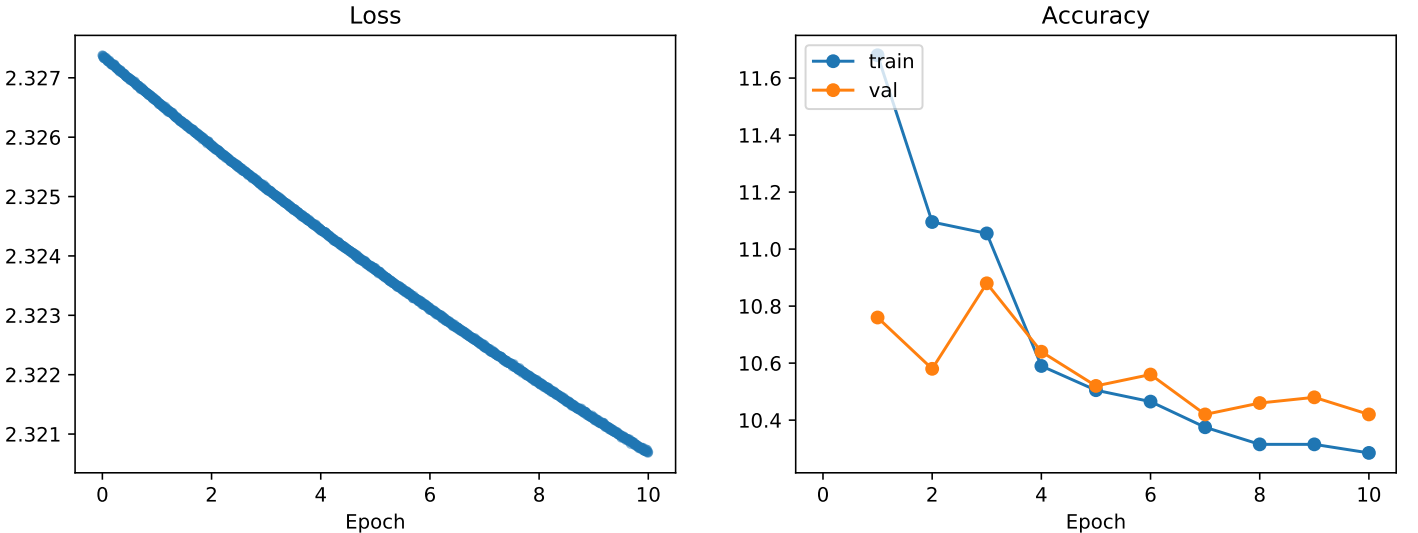

Unfortunately, it seems that your model is not training very effectively – the training loss has not decreased much from its initial value of ≈ 2.3, and the training and validation accuracies are very close to 10% which is what we would expect from a model that randomly guesses a category label for each input.

You will need to tune the hyperparameters of your model in order to improve it. **[TODO: Shivang]** Try changing the hyperparameters in the code block . You can consider changing any of the following hyperparameters:

• num train: The number of images to use for training

• hidden dim: The width of the hidden layer of the model

• batch size: The number of examples to use in each minibatch during SGD

• num epochs: How long to train the model. An epoch is a single pass through the training set.

• learning rate: The learning rate to use for SGD

• reg: The strength of the L2 regularization term

You should tune the hyperparameters and train a model that achieves at least 40% on the validation set. After tuning your model, run your best model exactly once on the test set using the function `test` function below.

In [73]:
# BLOCK NAME: Test
# BRIEF: Implements the test mechanism for your model

CHECKPOINT_FILENAME = os.path.join(source ,'checkpoint.pkl') # Modify this variable if your checkpoint is not at the root dir of the project folder
BATCH_SIZE = 128


def test():
    data = load_cifar10()
    sampler = DataSampler(data['X_test'], data['y_test'], BATCH_SIZE)
    print(f'Loading model from {CHECKPOINT_FILENAME}')
    model = TwoLayerNet.load(CHECKPOINT_FILENAME)
    acc = check_accuracy(model, sampler)
    print(f'Test-set accuracy: {acc:.2f}')

test()

Loading model from /content/drive/MyDrive/myCV/Assignment4/checkpoint.pkl
Test-set accuracy: 24.55


<font color='green'>[DATA]</font> <font color='blue'>[ANSWER]</font> **Task 5(b): Please include the loss / accuracy plot for your best model in your submission folder, describe the hyperparameter settings you used in the answer space below, and give the final test-set performance of your model (accuracy on the test set).** (5 pts)

*Answer*

**Hyper-parameters:**
  - num_train = 10000
  - batch_size = 128
  - num_epochs = 200
  - hidden_dim = 128
  - learning_rate = 1e-2
  - reg = 0.01

**Valid-set accuracy: 40.56**

**Test-set accuracy: 40.25**

**Accuracy Curve:**

![](https://drive.google.com/uc?id=14M-4GOe6vKeUeIQ5GmsycSDeiUaq9xFB)

You may not need to change all of the hyperparameters; some are fine at their default values. Your model shouldn’t take an excessive amount of time to train. For reference, our hyperparameter settings achieve ≈ 45% accuracy on the validation set in ≈ 5 minutes of training on a 2019 MacBook Pro.


To gain more experience with hyperparameters, you should also tune the hyperparameters to find a setting that results in an overfit model that achieves ≥ 75% accuracy on the training set.

<font color='green'>[DATA]</font> <font color='blue'>[ANSWER]</font> **Task 5(c): In your submission, include the loss / accuracy plot for your overfit model and describe the hyperparameter settings you used.** (5 pts)

*Note:* As above, this should not take an excessive amount of training time – we are able to train an overfit model that achieves ≈ 80% accuracy on the training set within about a minute of training.

**HINT**: It’s easier to overfit a smaller training set.

*Answer*

**Hyper-parameters:**
  - num_train = 100
  - batch_size = 100
  - num_epochs = 300
  - hidden_dim = 256
  - learning_rate = 5e-2
  - reg = 0.01

**Train-set accuracy: 77.00**

**Test-set accuracy: 24.55**

**Accuracy Curve:**

![](https://drive.google.com/uc?id=1-5HpS2PEZfV5_3VpdJFvyLY4sFxtE4V2)

# Exercise 3: *Semantic Segmentation* [30 pts]




In [4]:
# install required packages and download the dataset
!pip install colormap easydev pypng
!wget http://web.eecs.umich.edu/~justincj/teaching/eecs442/resources/facades.zip
!unzip facades.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 4.6 MB/s 
     |████████████████████████████████| 58 kB 7.1 MB/s 
  Created wheel for colormap: filename=colormap-1.0.4-py3-none-any.whl size=15638 sha256=85171431e290795b5f4212935e39d7c3fd9969c84c55c6dcf46fafe514c605bf
  Stored in directory: /root/.cache/pip/wheels/71/35/4b/259c328e39ede29b184e4ffe4443bcc2be4e475178a83794c3
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=8279507e4a04e8c5bccadad957f0eac4cfcdb4586f51e67564d7637c2d6a69e7
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built colormap easydev
--2022-11-27 20:50:12--  http://web.eecs.umich.edu/~justincj/teaching/eecs442/resources/facades.zip
Resolving web.eecs.umich.edu (web.eecs.umich.edu)... 141.212.113.214
Connecting to web.eecs.umich.edu (web.eecs.umich.edu)|141.212.1

In [5]:
import os
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
import png
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from PIL import Image
import torchvision
from colormap.colors import Color, hex2rgb
from sklearn.metrics import average_precision_score as ap_score
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torch.utils.data.dataset import Dataset
from tqdm import tqdm

In [6]:
if torch.cuda.is_available():
    print("Using the GPU. You are good to go!")
    device = torch.device('cuda:0')
else:
    raise Exception("WARNING: Could not find GPU! Using CPU only. \
To enable GPU, please to go Edit > Notebook Settings > Hardware \
Accelerator and select GPU.")

Using the GPU. You are good to go!


Convolutional Neural Networks are capable to generate dense predictions. A popular application is semantic segmentation. In this part, you will design and implement your Convolutional Neural Networks to perform semantic segmentation on the Mini Facade dataset.


Mini Facade dataset consists of images of different cities around the world and diverse architectural styles (in .jpg format), shown as the image on the left. It also contains semantic segmentation labels (in .png format) in 5 different classes: balcony, window, pillar, facade and others. Your task is to
train a network to convert image on the left to the labels on the right.

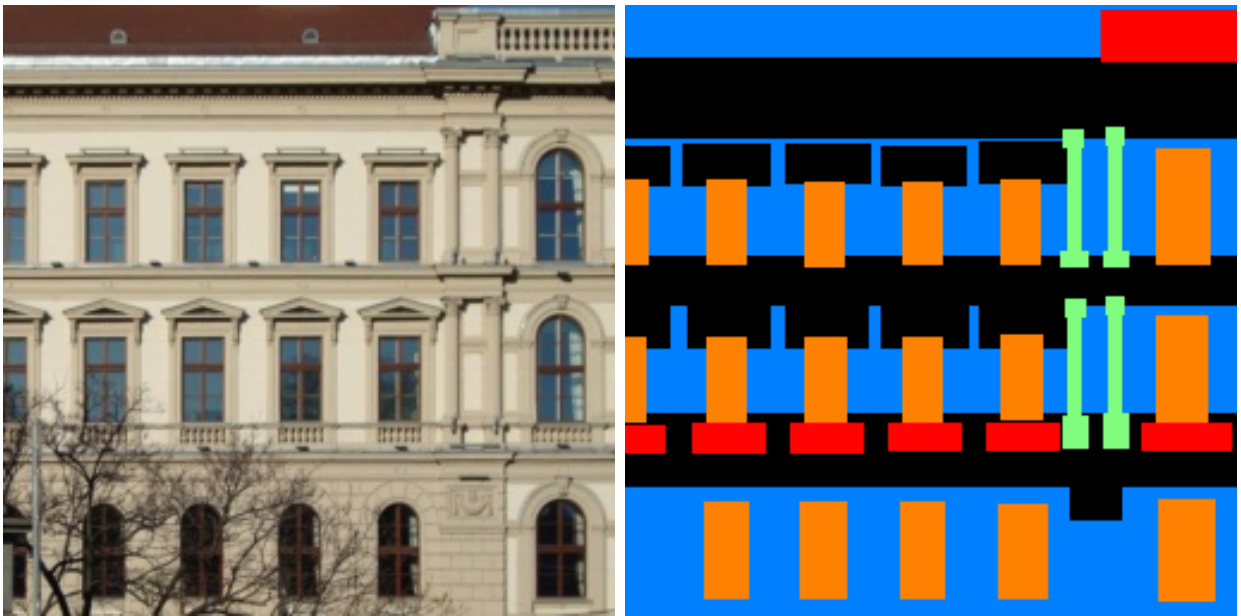

Note: The label images are plotted using 8-bit indexed color with pixel value listed in Table 1. We have
provided you a visualization function using a “jet” color map.

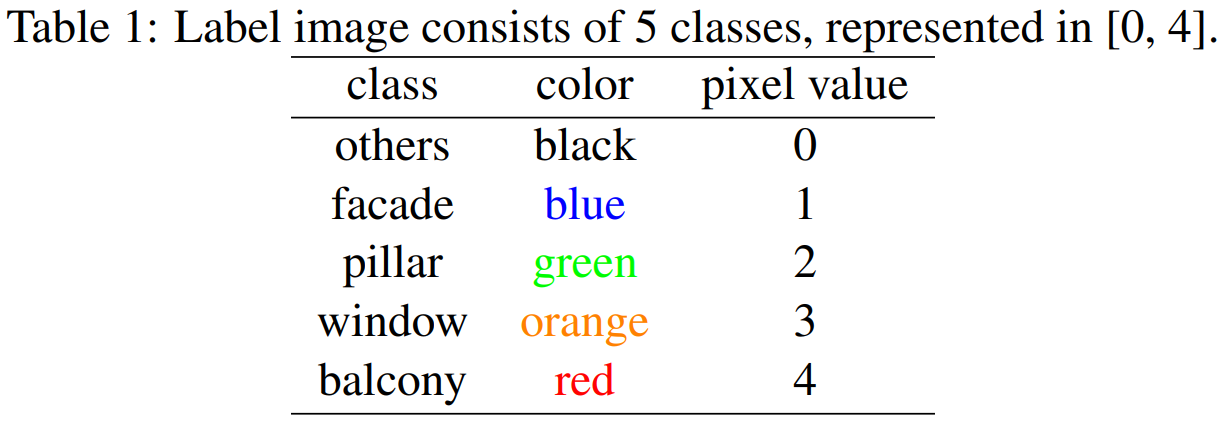

**Implementation Overview**

You need to implement

• A convolution network which takes an RGB image of size H × W × 3 and returns a segmentation map of size H × W × 5. There is a dummy network already present which uses a 1x1 convolution to convert 3 channels (RGB) to 5 channels, i.e. 5 heatmaps for each class, with cross-entropy loss.

• The optimizer (SGD, RMSProp, Adam, etc.) and its parameters. (weight decay is the L2 regularization strength)

• Training parameters (batch size and number of epochs)

We will evaluate your model on its average precision (AP) on the test set (higher the better). We have provided you the code to evaluate AP and you can directly use it. 


An introduction to AP is available at https://scikit-learn.org/stable/modules/model evaluation.html#precision-recall-f-measure-metrics.

Please follow the cell block and complete the task



<font color='red'>[CODE]</font> **Task 6(a): Complete all the TODOs in the below several code blocks.** (5 pts)

TODOs will include
1. Decide Train and Validation Split
2. Adjust Batch Size of Dataloader
3. Implementing a pytorch Model
4. Choosing an Optimizer
5. Saving the plots

## Dataset
We will create a custom Dataset function for the Mini Facade dataset. You don't have to change anything here.

In [7]:
class FacadeDataset(Dataset):
  def __init__(self, flag, dataDir='./facades/', data_range=(0, 8), n_class=5, 
               onehot=False):
    self.onehot = onehot
    assert(flag in ['train', 'eval', 'test', 'test_dev', 'kaggle'])
    print("load "+ flag+" dataset start")
    print("    from: %s" % dataDir)
    print("    range: [%d, %d)" % (data_range[0], data_range[1]))
    self.dataset = []
    for i in range(data_range[0], data_range[1]):
      img = Image.open(os.path.join(dataDir,flag,'eecs442_%04d.jpg' % i))

      pngreader = png.Reader(filename=os.path.join(dataDir,flag,
                                                   'eecs442_%04d.png' % i))
      w,h,row,info = pngreader.read()
      label = np.array(list(row)).astype('uint8')

      # Normalize input image
      img = np.asarray(img).astype("f").transpose(2, 0, 1)/128.0-1.0
      # Convert to n_class-dimensional onehot matrix
      label_ = np.asarray(label)
      label = np.zeros((n_class, img.shape[1], img.shape[2])).astype("i")
      for j in range(n_class):
          label[j, :] = label_ == j
      self.dataset.append((img, label))
    print("load dataset done")

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, index):
    img, label = self.dataset[index]
    label = torch.FloatTensor(label)
    if not self.onehot:
      label = torch.argmax(label, dim=0)
    else:
      label = label.long()

    return torch.FloatTensor(img), torch.LongTensor(label)

Now, we will create a dataloader for the Mini Facade dataset. You have to play with the size of train-val split and adjust the batch sizes for the splits.

In [8]:
N_CLASS=5
##############################################################################
# TODO: Change data_range so that train_data and val_data splits the 906     #
# samples under "train" folder. You can decide how to split.                 #
#                                                                            # 
# TODO: Adjust batch_size for loaders                                        #
##############################################################################
train_data = FacadeDataset(flag='train', data_range=(0,800), onehot=False)
train_loader = DataLoader(train_data, batch_size=4)
val_data = FacadeDataset(flag='train', data_range=(800,906), onehot=False)
val_loader = DataLoader(val_data, batch_size=4)
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################
test_data = FacadeDataset(flag='test_dev', data_range=(0,114), onehot=False)
test_loader = DataLoader(test_data, batch_size=1)

# ap_loader for calculating Average Precision
ap_data = FacadeDataset(flag='test_dev', data_range=(0,114), onehot=True)
ap_loader = DataLoader(ap_data, batch_size=1)

load train dataset start
    from: ./facades/
    range: [0, 800)
load dataset done
load train dataset start
    from: ./facades/
    range: [800, 906)
load dataset done
load test_dev dataset start
    from: ./facades/
    range: [0, 114)
load dataset done
load test_dev dataset start
    from: ./facades/
    range: [0, 114)
load dataset done


## Model
Design and implement your Convolutional NeuralNetworks to perform semantic segmentation on the Mini Facade dataset. 

You can build a simple neural network based on the U-net [1]:
1. Conv-ReLU-Conv-ReLU that goes from `3 -> 64 -> 64` ( H x W )
2. Maxpool (`nn.MaxPool2d`) to reduce the size of the feature map by half ( H/2 x W/2 )
3. Conv-ReLU-Conv-ReLU that goes from `64 -> 128 -> 128` ( H/2 x W/2 )
4. Maxpool (`nn.MaxPool2d`) to reduce the size of the feature map by half ( H/4 x W/4 )
5. Conv that goes from `128 -> 128` ( H/4 x W/4 )
6. Upsample (`nn.Upsample`) to increase of size of the feature map by two ( H/2 x W/2 )
6. Conv-ReLU-Conv-ReLU that goes from `128 -> 64 -> 64` ( H/2 x W/2 )
7. Upsample (`nn.Upsample`) to increase of size of the feature map by two ( H x W )
8. Conv-ReLU-Conv-ReLU that goes from `64 -> 64 -> 5` ( H x W )

Be careful while choosing the kernel size, padding and stride in the convolution layer. You can compute the output shape after a convolution by using the formula:

$$
X_{out} = (X_{in} - K + 2P)/S +1
$$

Where, $X_{out}$ & $X_{in}$ are the output and input shape of the feature map and $K$, $P$ & $S$ are the kernel size, padding and stride repectively.

[1] O. Ronneberger, P. Fischer, and T. Brox, “U-net:  Convolutional networks for biomedical image seg-mentation,”ArXiv, vol. abs/1505.04597, 2015

In [9]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.double_conv(x)
    
    
class DownBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownBlock, self).__init__()
        self.double_conv = DoubleConv(in_channels, out_channels)
        self.down_sample = nn.MaxPool2d(2)

    def forward(self, x):
        x = self.double_conv(x)
        return self.down_sample(x)

    
class UpBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UpBlock, self).__init__()
        self.up_sample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.double_conv = DoubleConv(in_channels, out_channels)

    def forward(self, down_input):
        x = self.up_sample(down_input)
        return self.double_conv(x)


class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.n_class = N_CLASS
    ########################################################################
    # TODO: Implement a sematic segmentation model                         #
    ########################################################################
    # self.layers = nn.Sequential(
    #     nn.Conv2d(3, self.n_class, 1, padding=0),
    #     nn.ReLU(inplace=True),
    #     )
    self.down_conv1 = DownBlock(3, 64)
    self.down_conv2 = DownBlock(64, 128)
    self.conv_bottleneck = nn.Conv2d(128, 128, kernel_size=3,padding=1)
    self.up_conv1 = UpBlock(128, 64)
    self.up_conv2 = UpBlock(64, self.n_class)
    ########################################################################
    #                             END OF YOUR CODE                         #
    ########################################################################

  def forward(self, x):
    ########################################################################
    # TODO: Implement the forward pass                                     #
    ########################################################################
    # x = self.layers(x)
    x = self.down_conv1(x)
    x = self.down_conv2(x)
    x = self.conv_bottleneck(x)
    x = self.up_conv1(x)
    x = self.up_conv2(x)
    ########################################################################
    #                             END OF YOUR CODE                         #
    ########################################################################
    return x

Ininitialize your model and look at the structure of your model, [torchsummary](https://github.com/sksq96/pytorch-summary) is a useful library to look at the computation graph of your model.

In [25]:
name = 'starter_net'
net = Net().to(device)
# visualizing the model
print('Your network:')
architect_info = summary(net, (3,224,224))

Your network:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
        DoubleConv-5         [-1, 64, 224, 224]               0
         MaxPool2d-6         [-1, 64, 112, 112]               0
         DownBlock-7         [-1, 64, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]          73,856
              ReLU-9        [-1, 128, 112, 112]               0
           Conv2d-10        [-1, 128, 112, 112]         147,584
             ReLU-11        [-1, 128, 112, 112]               0
       DoubleConv-12        [-1, 128, 112, 112]               0
        MaxPool2d-13          [-1, 128, 56, 56]               0
        DownBlock-14     

Once you have completed the model implementation in the cell above, run the cell below to load helper functions and train the model.

In [17]:
def save_label(label, path):
  '''
  Function for ploting labels.
  '''
  colormap = [
      '#000000',
      '#0080FF',
      '#80FF80',
      '#FF8000',
      '#FF0000',
  ]
  assert(np.max(label)<len(colormap))
  colors = [hex2rgb(color, normalise=False) for color in colormap]
  w = png.Writer(label.shape[1], label.shape[0], palette=colors, bitdepth=4)
  with open(path, 'wb') as f:
      w.write(f, label)

def train(trainloader, net, criterion, optimizer, device, epoch):
  '''
  Function for training.
  '''
  start = time.time()
  running_loss = 0.0
  cnt = 0
  net = net.train()
  for images, labels in tqdm(trainloader):
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    output = net(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    cnt += 1
  end = time.time()
  running_loss /= cnt
  print('\n [epoch %d] loss: %.3f elapsed time %.3f' %
        (epoch, running_loss, end-start))
  return running_loss

def test(testloader, net, criterion, device):
  '''
  Function for testing.
  '''
  losses = 0.
  cnt = 0
  with torch.no_grad():
    net = net.eval()
    for images, labels in tqdm(testloader):
      images = images.to(device)
      labels = labels.to(device)
      output = net(images)
      loss = criterion(output, labels)
      losses += loss.item()
      cnt += 1
  print('\n',losses / cnt)
  return (losses/cnt)


def cal_AP(testloader, net, criterion, device):
  '''
  Calculate Average Precision
  '''
  losses = 0.
  cnt = 0
  with torch.no_grad():
    net = net.eval()
    preds = [[] for _ in range(5)]
    heatmaps = [[] for _ in range(5)]
    for images, labels in tqdm(testloader):
      images = images.to(device)
      labels = labels.to(device)
      output = net(images).cpu().numpy()
      for c in range(5):
        preds[c].append(output[:, c].reshape(-1))
        heatmaps[c].append(labels[:, c].cpu().numpy().reshape(-1))

    aps = []
    for c in range(5):
      preds[c] = np.concatenate(preds[c])
      heatmaps[c] = np.concatenate(heatmaps[c])
      if heatmaps[c].max() == 0:
        ap = float('nan')
      else:
        ap = ap_score(heatmaps[c], preds[c])
        aps.append(ap)
      print("AP = {}".format(ap))
    print("Average Precision (all classes) = {}".format(np.mean(aps)))
  return None


def get_result(testloader, net, device, folder='output_train'):
  result = []
  cnt = 1
  os.makedirs(os.path.join(source, folder), exist_ok=True)
  with torch.no_grad():
    net = net.eval()
    cnt = 0
    for images, labels in tqdm(testloader):
      images = images.to(device)
      labels = labels.to(device)
      output = net(images)[0].cpu().numpy()
      c, h, w = output.shape
      assert(c == N_CLASS)
      y = np.argmax(output, 0).astype('uint8')
      gt = labels.cpu().data.numpy().squeeze(0).astype('uint8')
      save_label(y, os.path.join(source, '{}/y{}.png'.format(folder, cnt)))
      save_label(gt, os.path.join(source, '{}/gt{}.png'.format(folder, cnt)))
      plt.imsave(os.path.join(source,'{}/x{}.png'.format(folder, cnt)),
                 ((images[0].cpu().data.numpy()+1)*128).astype(np.uint8).transpose(1,2,0))
      cnt += 1

def plot_hist(trn_hist, val_hist):
    x = np.arange(len(trn_hist))
    plt.figure()
    plt.plot(x, trn_hist)
    plt.plot(x, val_hist)
    plt.legend(['Training', 'Validation'])
    plt.xticks(x)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.savefig(os.path.join(source,'3_loss_curve.png'))
    plt.show()

Experiment with with different optimizers, parameters (such as learning rate) and number of epochs. We expect you to achieve **0.45 AP** on the test set

In [12]:
%%time
criterion = nn.CrossEntropyLoss()
##############################################################################
# TODO: Modify the lines below to experiment with different optimizers,      #
# parameters (such as learning rate) and number of epochs.                   #
##############################################################################
optimizer = torch.optim.Adam(net.parameters(), 5e-4, weight_decay=1e-5)
num_epoch = 25
##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################

print('\nStart training')
trn_hist = []
val_hist = []
for epoch in range(num_epoch): #TODO: Change the number of epochs
  print('-----------------Epoch = %d-----------------' % (epoch+1))
  trn_loss = train(train_loader, net, criterion, optimizer, device, epoch+1)
  print('Validation loss: ')
  val_loss = test(val_loader, net, criterion, device)
  trn_hist.append(trn_loss)
  val_hist.append(val_loss)


Start training
-----------------Epoch = 1-----------------


100%|██████████| 200/200 [00:20<00:00,  9.89it/s]



 [epoch 1] loss: 1.359 elapsed time 20.226
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.80it/s]



 1.234059245498092
-----------------Epoch = 2-----------------


100%|██████████| 200/200 [00:19<00:00, 10.27it/s]



 [epoch 2] loss: 1.233 elapsed time 19.486
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.56it/s]



 1.2002761408134743
-----------------Epoch = 3-----------------


100%|██████████| 200/200 [00:20<00:00,  9.73it/s]



 [epoch 3] loss: 1.113 elapsed time 20.567
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.87it/s]



 1.0293565458721585
-----------------Epoch = 4-----------------


100%|██████████| 200/200 [00:20<00:00,  9.65it/s]



 [epoch 4] loss: 1.021 elapsed time 20.728
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.94it/s]



 0.9588772831139741
-----------------Epoch = 5-----------------


100%|██████████| 200/200 [00:19<00:00, 10.23it/s]



 [epoch 5] loss: 0.945 elapsed time 19.552
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.84it/s]



 0.9162397185961405
-----------------Epoch = 6-----------------


100%|██████████| 200/200 [00:19<00:00, 10.22it/s]



 [epoch 6] loss: 0.909 elapsed time 19.578
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 16.01it/s]



 0.8687214520242479
-----------------Epoch = 7-----------------


100%|██████████| 200/200 [00:19<00:00, 10.29it/s]



 [epoch 7] loss: 0.876 elapsed time 19.461
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.71it/s]



 0.8468438828433001
-----------------Epoch = 8-----------------


100%|██████████| 200/200 [00:19<00:00, 10.18it/s]



 [epoch 8] loss: 0.846 elapsed time 19.658
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.80it/s]



 0.8140195144547356
-----------------Epoch = 9-----------------


100%|██████████| 200/200 [00:20<00:00,  9.99it/s]



 [epoch 9] loss: 0.822 elapsed time 20.022
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.92it/s]



 0.7946507467163934
-----------------Epoch = 10-----------------


100%|██████████| 200/200 [00:19<00:00, 10.12it/s]



 [epoch 10] loss: 0.801 elapsed time 19.770
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.98it/s]



 0.780159577175423
-----------------Epoch = 11-----------------


100%|██████████| 200/200 [00:21<00:00,  9.45it/s]



 [epoch 11] loss: 0.787 elapsed time 21.178
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.55it/s]



 0.7725594970915053
-----------------Epoch = 12-----------------


100%|██████████| 200/200 [00:19<00:00, 10.12it/s]



 [epoch 12] loss: 0.774 elapsed time 19.776
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.73it/s]



 0.7569493077419422
-----------------Epoch = 13-----------------


100%|██████████| 200/200 [00:19<00:00, 10.08it/s]



 [epoch 13] loss: 0.760 elapsed time 19.851
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.91it/s]



 0.7500067816840278
-----------------Epoch = 14-----------------


100%|██████████| 200/200 [00:19<00:00, 10.12it/s]



 [epoch 14] loss: 0.747 elapsed time 19.775
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.74it/s]



 0.7373612699685274
-----------------Epoch = 15-----------------


100%|██████████| 200/200 [00:19<00:00, 10.13it/s]



 [epoch 15] loss: 0.735 elapsed time 19.757
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.98it/s]



 0.7264097222575435
-----------------Epoch = 16-----------------


100%|██████████| 200/200 [00:19<00:00, 10.11it/s]



 [epoch 16] loss: 0.720 elapsed time 19.784
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.52it/s]



 0.715531830434446
-----------------Epoch = 17-----------------


100%|██████████| 200/200 [00:19<00:00, 10.08it/s]



 [epoch 17] loss: 0.707 elapsed time 19.850
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.66it/s]



 0.7079135930096662
-----------------Epoch = 18-----------------


100%|██████████| 200/200 [00:19<00:00, 10.14it/s]



 [epoch 18] loss: 0.695 elapsed time 19.742
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.52it/s]



 0.6993392330628855
-----------------Epoch = 19-----------------


100%|██████████| 200/200 [00:21<00:00,  9.49it/s]



 [epoch 19] loss: 0.679 elapsed time 21.093
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.77it/s]



 0.6877835635785703
-----------------Epoch = 20-----------------


100%|██████████| 200/200 [00:20<00:00,  9.76it/s]



 [epoch 20] loss: 0.662 elapsed time 20.500
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.52it/s]



 0.6815092938917654
-----------------Epoch = 21-----------------


100%|██████████| 200/200 [00:20<00:00,  9.93it/s]



 [epoch 21] loss: 0.653 elapsed time 20.163
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.49it/s]



 0.6768925653563606
-----------------Epoch = 22-----------------


100%|██████████| 200/200 [00:19<00:00, 10.02it/s]



 [epoch 22] loss: 0.638 elapsed time 19.963
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.67it/s]



 0.6696358168566668
-----------------Epoch = 23-----------------


100%|██████████| 200/200 [00:20<00:00,  9.90it/s]



 [epoch 23] loss: 0.627 elapsed time 20.217
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.49it/s]



 0.6622952101407228
-----------------Epoch = 24-----------------


100%|██████████| 200/200 [00:20<00:00,  9.94it/s]



 [epoch 24] loss: 0.613 elapsed time 20.133
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 15.94it/s]



 0.6571386346110591
-----------------Epoch = 25-----------------


100%|██████████| 200/200 [00:20<00:00,  9.94it/s]



 [epoch 25] loss: 0.604 elapsed time 20.125
Validation loss: 


100%|██████████| 27/27 [00:01<00:00, 14.72it/s]


 0.6486002339257134
CPU times: user 9min, sys: 3.27 s, total: 9min 3s
Wall time: 9min 4s


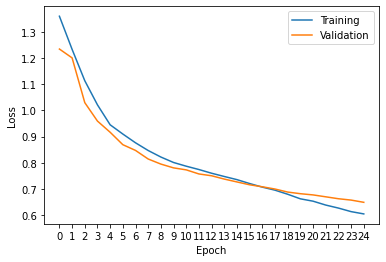


Finished Training, Testing on test set


100%|██████████| 114/114 [00:02<00:00, 48.10it/s]



 0.7873377737246061

Generating Unlabeled Result


100%|██████████| 114/114 [00:01<00:00, 91.32it/s]


AP = 0.48328873244275683
AP = 0.676051113217244
AP = 0.07401070148496139
AP = 0.7996862193239824
AP = 0.5013090306377423
Average Precision (all classes) = 0.5068691594213373


In [18]:
plot_hist(trn_hist, val_hist)
###########################################################################################
# TODO: Submit the "Average Precision(all classes)" value in the answer block of TASK 6(b)#
###########################################################################################
print('\nFinished Training, Testing on test set')
test(test_loader, net, criterion, device)
print('\nGenerating Unlabeled Result')
##############################################################################
# You can visualize your segmentation results using get_results function     #
# Your result will be dumped in the folder 'output_test'.                    #
# There will be three files for each image:                                   # 
#   (1) gt<num>.png (ground truth label)                                     #
#   (2) x<num>.png (input RGB image)                                         #
#   (3) y<num>.png (predicted output)                                        #
#                                                                            #
# TODO: Find a satisfactory result by running the next cell and report       #
#       the plot of gt<num>.png, x<num>.png and y<num>.png in the TASK 6(d)  #
# Note: Your submission doesn't have to be perfect.                          #
##############################################################################
result = get_result(test_loader, net, device, folder='output_test')

os.makedirs(os.path.join(source, 'models'), exist_ok=True)
torch.save(net.state_dict(), os.path.join(source, 'models/model_{}.pth'.format(name)))

cal_AP(ap_loader, net, criterion, device)

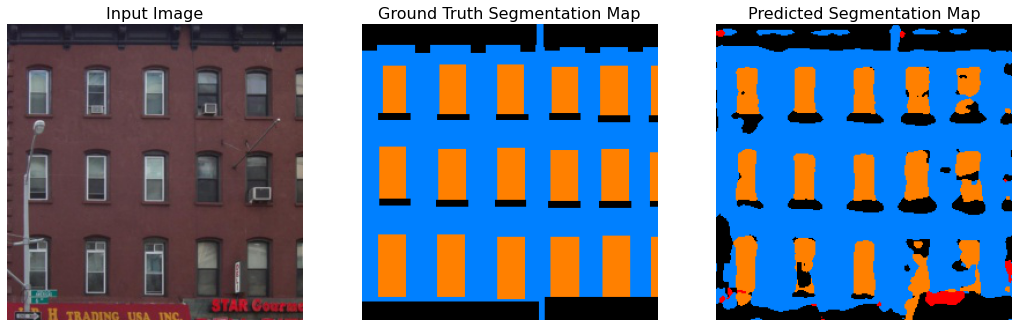

In [19]:
########################################################################
# TODO: Find a satisfactory result from the 114 test images            #
#       Submit the result in your submission                           #
# Note: Your submission doesn't have to be perfect.                    #
########################################################################
img_idx = 7
########################################################################
#                             END OF YOUR CODE                         #
########################################################################
output_dir = os.path.join(source, 'output_test')

plt.subplot(1, 3, 1)
plt.imshow(Image.open(os.path.join(output_dir, 'x{}.png'.format(img_idx))))
plt.title('Input Image', fontsize=16)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(Image.open(os.path.join(output_dir, 'gt{}.png'.format(img_idx))))
plt.title('Ground Truth Segmentation Map', fontsize=16)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(Image.open(os.path.join(output_dir, 'y{}.png'.format(img_idx))))
plt.title('Predicted Segmentation Map', fontsize=16)
plt.axis('off')

plt.gcf().set_size_inches(18, 10)
plt.savefig(os.path.join(source,'3_test_sample.png'))
plt.show()

<font color='green'>[DATA]</font> <font color='blue'>[ANSWER]</font> **Task 6(b):** Write down the detailed architecture of your model. Include information on hyperparameters chosen for training and show a plot showing both training and validation loss across iterations. (10 pts)

*Answer*

**Hyperparameters and other custom defined parameters are listed below:**
  - Batch Size = 4
  - Number of Epochs = 25
  - Train/Validation partitions: 800 / 106
  - Optimizer: Adam


**The model I have defined is a simplified version of U-Net, by ommitting the skip connections from downsampled features to the upsampled ones. Summary of layers in the network is shown below:**

![](https://drive.google.com/uc?id=19sxRfrfjR-eO_z1LWWSUrmyGceG4BRK2)

**Also the loss curves is printed bleow:**

![](https://drive.google.com/uc?id=1--wH9Fazil_6x2gG1NSwRtl4rtf9ndpi)

<font color='blue'>[ANSWER]</font> **Task 6(c):** Write down the average precision on the test set in the answer block below. The function `cal_AP` will calculate the average precision on the test set. All hyperparameter tuning should be done on the validation set. We expect you to achieve over 0.45 AP on the test set. (10 pts)

*Answer*

**Average Precision (all classes) = 0.4969390874853691**

<font color='green'>[DATA]</font> Task 6(d): Find a satisfactory result in the `output_test` folder generated by the `get_result` function and show it below. There should be three images for each input - gt<num>.png (ground truth label), x<num>.png (input RGB image) and y<num>.png (predicted label). Below is an example of a satisfactory result. (5 pts)

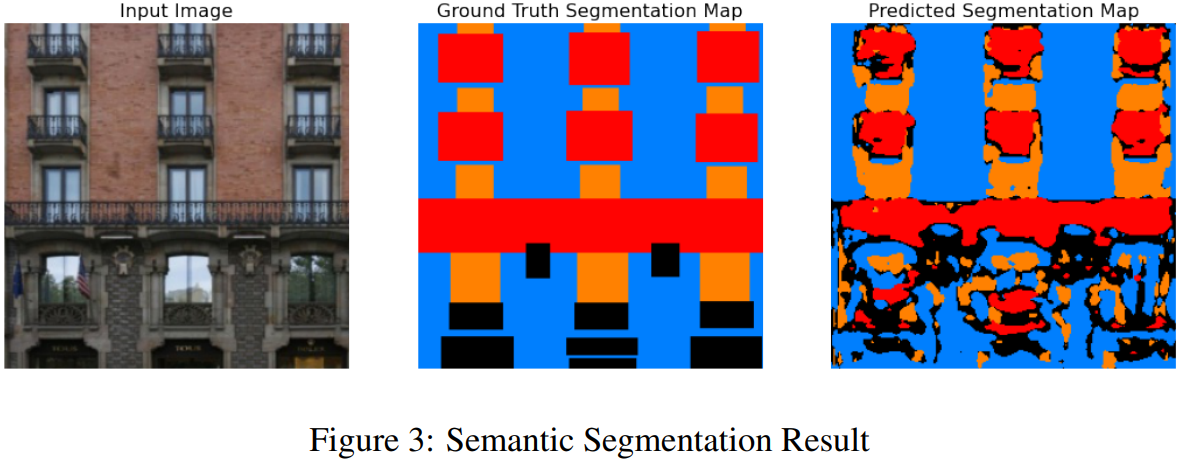

*Show Here*

**The result for test sample #7 is shown below:**
![](https://drive.google.com/uc?id=1-0CmHg-yUKWI_M9BbApvsYqzv3H2-BLN)